<img width="300" src="https://raw.githubusercontent.com/bghaendler/BJBS-AI-LAB/master/img/BJBSAILogo.png" align="right"> 
# Session 5: Loan Prediction
### Classification Problem

### Libraries required

In [ ]:
!pip install imblearn

In [ ]:
!pip install catboost

     |████████████████████████████████| 66.1MB 66kB/s 


In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "xxxxxxxx" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxxxx" # key from the json file
!kaggle datasets download -d mirbektoktogaraev/should-this-loan-be-approved-or-denied # api copied from kaggle

 88% 41.0M/46.4M [00:00<00:00, 39.2MB/s]
100% 46.4M/46.4M [00:00<00:00, 94.3MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile("/content/should-this-loan-be-approved-or-denied.zip","r") as zip_ref:
    zip_ref.extractall("input")

In [ ]:

#from google.colab import drive
#drive.mount('/content/drive')
#import zipfile
#with zipfile.ZipFile("/content/drive/My Drive/01 - Trabajo/558648_1018837_bundle_archive.zip","r") as zip_ref:
#    zip_ref.extractall("input")

# Frame the problem and look at the Big Picture




### Context

- The dataset is from the U.S. Small Business Administration (SBA)

- The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment.

- There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.



## Content


Shape of the data: 899164 rows and 27 columns

## ABSTRACT


- In this article, a large and rich dataset from the **U.S. Small Business Administration (SBA) and an accompanying assignment designed to teach statistics as an investigative process of decision making are presented**. 
- Guidelines for the assignment titled “Should This Loan Be Approved or Denied?,” along with a subset of the larger dataset, are provided. 
- For this case-study assignment, students assume the **role of loan officer at a bank and are asked to approve or deny a loan by assessing its risk of default using logistic regression**. 
- Since this assignment is designed for introductory business statistic courses, additional methods for more advanced data analysis courses are also suggested.

## 1. Introduction

- In the American Statistical Association’s (ASA’s) Guidelines for Assessment and Instruction in Statistics Education (GAISE) College Report (GAISE College Report ASA Revision Commit- tee 2016), the following **recommendations were made to teach introductory statistics**:
  - (a) **Teach statistical thinking**. Teach statistics as an investiga- tive process of problem solving and decision making. Give students experience with **multivariable thinking**.
  - (b) Focus on **conceptual understanding**.
  - (c) **Integrate real data with a context and purpose**.
  - (d) **Foster active learning**.
  - (e) Use **technology** to explore concepts and analyze data.
  - (f) Use **assessments** to improve and evaluate student
learning.
- In this article, we take into account these recommendations
by providing a rich and large dataset which itself is a significant contribution, for it can be used by educators to create learning opportunities that are aligned with the 2016 GAISE recommendations.  
- In conjunction with the dataset, a **set of guidelines** for a case-study assignment designed with the aforementioned recommendations in mind is also described.
- The dataset accompanying this article is a **real dataset from the U.S. Small Business Administration (SBA)**. The case-study assignment, titled “Should This Loan be Approved or Denied?” is designed to teach statistical thinking by focusing on how to use real data to make informed decisions for a particular purpose. 
- For this assignment, students assume the **role of a loan officer who is deciding whether to approve a loan to a small business**.
- By analyzing real data, students experience statistics as an investigative process of decision making, for the student is required to answer the following question: 


- **As a representative of the bank, should I grant a loan to a particular small business (Company X)?** Why or why not? The student makes this decision by assessing a loan’s risk.
  - The assessment is accomplished by estimating the loan’s default probability through analyzing this historical dataset and then classifying the loan into one of two categories: 
      - (a) **higher risk—likely** to default on the loan (i.e., be charged off/failure to pay in full) or 
      - (b) **lower risk—likely** to pay off the loan in full. The process of making this determination requires students to conceptually understand the statistical concepts and how to apply them.
- We have used an adapted version of this case-study assignment in data analysis courses for both undergraduate and graduate business students. 
  - These courses cover topics ranging from regression and analysis of variance in the undergraduate course to data mining in the graduate course. 
  - For all courses, logistic regression is included in the assignment while neural networks and support vector machines (SVMs) are introduced only in the graduate course.
- For both courses, we initially present this as an in-class, interactive assignment. We spend two or three 75-min class periods in computer labs guiding students through specific steps in how to analyze this large dataset to help inform their decision making processes. 
- To foster an active learning environment, we encourage discussion and questions during these class periods and typically break the students into groups to discuss certain steps and then ask them to present their ideas and rationale. To assess students’ statistical thinking, students are presented a similar case and required to write a report describing their loan decisions and rationale behind such decisions.

- This assignment is ideal for data analysis courses for several reasons.
  - (a) The case study incorporates all of the 2016 GAISE recommendations.
  - (b) The topic itself captures students’ interest, for it is an application of actual data related to real-life financial decisions.
  - (c) Students are exposed to managing a large dataset and understanding how historical data can be used to make informed decisions.
  - (d) Critical thinking is promoted; analysis, synthesis, and decision making skills are used.
  - (e) Students are introduced to logistic regression and other more advanced methods for classification.
  - (f) The importance of identifying reasonable explanatory variables (e.g., risk indicators for loan default) to incorporate into statistical models provides lively and engaging discussions.
- Moreover, business statistics instructors have reported that the use of case-study assignments has resulted in increased stu- dent motivation and participation, increased student awareness of the relevance of statistics to business decision making, and more positive classroom experiences for the instructor (e.g., Bryant 1999; Nolan and Speed 1999; Parr and Smith 1998; Smith and Bryant 2009). We have experienced similar benefits with this case-study assignment.

## 2. Background and Description of Datasets


- **The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market** (SBA Overview and History, US Small Business Administration (2015)). 
  - Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. 
  - One way SBA assists these small business enterprises is through a loan guarantee program which is designed to encourage banks to grant loans to small businesses. 
  - SBA acts much like an insurance provider to reduce the risk for a bank by taking on some of the risk through guaranteeing a portion of the loan. **In the case that a loan goes into default, SBA then covers the amount they guaranteed**.
- There have been many **success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer**. 
  - However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans. 
  - The rate of default on these loans has been a source of controversy for decades. 
    - Conservative economists believe that credit markets perform efficiently without government participation. 
    - Supporters of SBA- guaranteed loans argue that the social benefits of job creation by those small businesses receiving government- guaranteed loans far outweigh the costs incurred from defaulted loans.

- **Since SBA loans only guarantee a portion of the entire loan balance, banks will incur some losses if a small business defaults on its SBA-guaranteed loan**. Therefore, banks are still faced with a difficult choice as to whether they should grant such a loan because of the high risk of default. 
- One way to inform their decision making is through analyzing relevant historical data such as the datasets provided here.
- Two datasets are provided: 
  - (a) “**National SBA” dataset** (named SBAnational.csv) from the U.S. SBA which includes historical data from 1987 through 2014 (899,164 observa- tions)1 and 
  - (b) “**SBA Case” dataset** (named SBAcase.csv) which is used in the assignment described in this paper (2102 observations). 
  - The “SBA Case” dataset is a subset of the “National SBA.”2
- The variable name, the data type, and a brief description of each variable are provided for the 27 variables in the two data- sets (see Table 1(a)). For the “SBA Case” dataset, an additional eight variables were generated by the authors as part of the assignment (see Table 1(b)) and described in Sections 4.1.4, 4.1.5, 4.1.6, 4.1.7, and 4.3.1. For most of the variables, the description is self-evident. 
- The variables needing further explanation include: NAICS, NewExist, LowDoc, and MIS_Status and are described below.

- **NAICS (North American Industry Classification System)**: 
  - This is a 2- through 6-digit hierarchical classification system used by Federal statistical agencies in classifying business establishments for the collection, analysis, and presentation of statistical data describing the U.S. economy. The first two digits of the NAICS classification represent the economic sector. 

## Data Dictionary


|Variable Name	| Description|
----------------|--------------
LoanNr_ChkDgt	|Identifier Primary key
Name	|Borrower name
City	|Borrower city
State	|Borrower state
Zip	|Borrower zip code
Bank	|Bank name
BankState	|Bank state
NAICS	|North American industry classification system code
ApprovalDate	|Date SBA commitment issued
ApprovalFY	|Fiscal year of commitment
Term	|Loan term in months
NoEmp	|Number of business employees
NewExist	|1 = Existing business, 2 = New business
CreateJob	|Number of jobs created
RetainedJob	|Number of jobs retained
FranchiseCode	|Franchise code, (00000 or 00001) = No franchise
UrbanRural	|1 = Urban, 2 = rural, 0 = undefined
RevLineCr	|Revolving line of credit: Y = Yes, N = No
LowDoc	|LowDoc Loan Program: Y = Yes, N = No
ChgOffDate	|The date when a loan is declared to be in default
DisbursementDate	|Disbursement date
DisbursementGross	|Amount disbursed
BalanceGross	|Gross amount outstanding
MIS_Status	|Loan status charged off = CHGOFF, Paid in full =PIF
ChgOffPrinGr	|Charged-off amount
GrAppv	|Gross amount of loan approved by bank
SBA_Appv	|SBA’s guaranteed amount of approved loan


### Description of the first two digits of NAICS.


Sector	|Description
-------|-------
11	|Agriculture, forestry, fishing and hunting
21	|Mining, quarrying, and oil and gas extraction
22	|Utilities
23	|Construction
31–33	|Manufacturing
42	|Wholesale trade
44–45	|Retail trade
48–49	|Transportation and warehousing
51	|Information
52	|Finance and insurance
53	|Real estate and rental and leasing
54	|Professional, scientific, and technical services
55	|Management of companies and enterprises
56	|Administrative and support and waste management and remediation services
61	|Educational services
62	|Health care and social assistance
71	|Arts, entertainment, and recreation
72	|Accommodation and food services
81	|Other services (except public administration) 
92  |Public administration

- **NewExist** (1 D Existing Business, 2 D New Business): This represents whether the business is an existing business (in existence for more than 2 years) or a new business (in existence for less than or equal to 2 years).
- **LowDoc** (Y D Yes, N D No): In order to process more loans efficiently, a “LowDoc Loan” program was implemented where **loans under $150,000 can be processed using a one-page application**. “Yes” indicates loans with a one-page application, and “No” indicates loans with more information attached to the application. 
  - In this dataset, 87.31% are coded as N (No) and 12.31% as Y (Yes) for a total of 99.62%. It is worth noting that 0.38% have other values (0, 1, A, C, R, S); these are data entry errors. 
  - There are also 2582 missing values for this variable, excluded when calculating these proportions. We have chosen to leave these entries “as is” to provide students the opportunity to learn how to deal with datasets with such errors.
- **MIS_Status**: This variable indicates the status of the loan: defaulted/charged off (CHGOFF) or have been successfully paid in full (PIF).

## Libraries

In [ ]:
import numpy as np 
import pandas as pd 
from scipy import stats # statistic library
import datetime
import math
from datetime import date


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:

print(os.listdir("input"))

['Should This Loan be Approved or Denied A Large Dataset with Class Assignment Guidelines.pdf', 'SBAnational.csv']


# Get Data

In [ ]:
df= pd.read_csv('/content/input/SBAnational.csv',   parse_dates=["ApprovalDate","DisbursementDate"], infer_datetime_format=True)
df.sample(10)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


LoanNr_ChkDgt  ...      SBA_Appv
730261     7598814008  ...  $487,500.00 
133516     1974715006  ...   $17,500.00 
159213     2154284000  ...  $240,000.00 
121256     1885475004  ...   $20,000.00 
401631     3872344004  ...  $636,825.00 
292457     3025186006  ...  $100,000.00 
30149      1227204006  ...   $80,000.00 
620495     6166234002  ...    $5,750.00 
369491     3583024006  ...   $75,000.00 
383018     3693765002  ...  $513,000.00 

[10 rows x 27 columns]

# Exploratory Data Analysis

### Data Cleaning / Data Preparation

In [ ]:
curr_col = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
df[curr_col] = df[curr_col].replace('[\$,]', '', regex=True).astype(float) 
df['ApprovalFY'].replace('1976A', 1976, inplace=True)
df['ApprovalFY']= df['ApprovalFY'].astype(int)
df['MIS_Status'] = df['MIS_Status'].replace({'P I F': 0, 'CHGOFF':1})
df['LowDoc'] = df['LowDoc'].replace({'[C, S, A, R, 1, 0]':np.nan})
df['LowDoc'] = df['LowDoc'].replace({'N': 0, 'Y':1})
df['LowDoc'] = np.where((df['LowDoc'] != 0) & (df['LowDoc'] != 1), np.nan, df.LowDoc)
df['RevLineCr'] = df['RevLineCr'].replace({'N': 0, 'Y':1, })
df['RevLineCr'] = df['RevLineCr'].replace({'0': 0, '1':1, })
df['RevLineCr'] = np.where((df['RevLineCr'] != 0) & (df['RevLineCr'] != 1), np.nan, df.RevLineCr)
df['NewExist'] = df['NewExist'].replace({1.0: 0, 2.0:1, 0:np.nan}).fillna(0).astype(int)
df['FranchiseCode'] = df['FranchiseCode'].replace(1,0 )	
df['FranchiseCode'] = np.where((df.FranchiseCode != 0 ),1,df.FranchiseCode)
df.rename(columns={"FranchiseCode": "Is_Franchised"}, inplace=True)
df['CreateJob'] = np.where((df.CreateJob > 0 ),1,df.CreateJob)
df.rename(columns={"CreateJob": "Is_CreatedJob"}, inplace=True)
df['RetainedJob'] = np.where((df.RetainedJob > 0 ),1,df.RetainedJob)
df.rename(columns={"RetainedJob": "Is_RetainedJob"}, inplace=True)
df['RealEstate'] = df['Term'].apply(lambda x: 1 if x >= 240 else 0)
df['DaysTerm'] =  df['Term']*30
df['Active'] = df['DisbursementDate'] + pd.TimedeltaIndex(df['DaysTerm'], unit='D')
startdate = datetime.datetime.strptime('2007-12-1', "%Y-%m-%d").date()
enddate = datetime.datetime.strptime('2009-06-30', "%Y-%m-%d").date()
df['Recession'] = df['Active'].apply(lambda x: 1 if startdate <= x <= enddate else 0)

In [ ]:
#df['NAICS']

In [ ]:
ind_code = df['NAICS']

#The function to take the first 2 digits of the code
def get_code(ind_code):
    if ind_code <= 0:
        return 0
    return (ind_code // 10 ** (int(math.log(ind_code, 10)) - 1))

#Converts 2 digits to sector names
def sector_name(i):
    def_code = {11:'Agriculture, Forestry, Fishing & Hunting', 
                21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 
                23:'Constuction', 
                31:'Manufacturing', 
                32:'Manufacturing', 
                33:'Manufacturing',
                42:'Wholesale Trade', 
                44:'Retail Trade', 
                45:'Retail Trade', 
                48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 
                51:'Information', 
                52:'Finance & Insurance', 
                53:'Real Estate, Rental & Leasing', 
                54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise', 
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 
                62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 
                72:'Accomodation & Food Service',
                81:'Other Servieces (Ex: Public Administration)', 
                92:'Public Administration'
               }
    if i in def_code:
        return def_code[i]
    
def def_rate(i):
    sector_default = {21:0.08, 
                      11:0.09, 
                      55:0.10, 
                      62:0.10, 
                      22:0.14, 
                      92:0.15,
                      54:0.19, 
                      42:0.19,
                      31:0.19,
                      32:0.16,
                      33:0.14,
                      81:0.20,
                      71:0.21,
                      72:0.22,
                      44:0.22,
                      45:0.23,
                      23:0.23,
                      56:0.24,
                      61:0.24,
                      51:0.25,
                      48:0.27,
                      49:0.23,
                      52:0.28,
                      53:0.29}
    if i in sector_default:
        return sector_default[i]
    return np.nan

In [ ]:
### Create a new column that is ind_code
df['ind_code'] = df.NAICS.apply(get_code)

#Create a new column that is Sector_name
df['Sector_name'] = df.ind_code.apply(sector_name)

#Create a new column that is Sector_rate
df['Sector_rate'] = df.NAICS.apply(get_code).apply(def_rate)

In [ ]:
def_state = df.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state = def_state.drop(axis=1, columns=[0.0, 1.0]).round(1).to_dict()

#Second, make the function change the area according to the default rate
def state_def_rate(i):
    def_state = {'AK': 0.1,'AL': 0.2, 'AR': 0.2, 'AZ': 0.2,'CA': 0.2, 'CO': 0.2, 'CT': 0.1, 'DC': 0.2,
                 'DE': 0.2, 'FL': 0.3, 'GA': 0.2, 'HI': 0.2, 'IA': 0.1, 'ID': 0.1, 'IL': 0.2, 'IN': 0.2, 
                 'KS': 0.1, 'KY': 0.2, 'LA': 0.2, 'MA': 0.1, 'MD': 0.2, 'ME': 0.1, 'MI': 0.2, 'MN': 0.1,
                 'MO': 0.2, 'MS': 0.2, 'MT': 0.1, 'NC': 0.2, 'ND': 0.1, 'NE': 0.1, 'NH': 0.1, 'NJ': 0.2,
                 'NM': 0.1, 'NV': 0.2, 'NY': 0.2, 'OH': 0.2, 'OK': 0.2, 'OR': 0.2, 'PA': 0.1, 'RI': 0.1,
                 'SC': 0.2, 'SD': 0.1, 'TN': 0.2, 'TX': 0.2, 'UT': 0.2, 'VA': 0.2, 'VT': 0.1, 'WA': 0.1,
                 'WI': 0.1, 'WV': 0.2, 'WY': 0.1}

    if i in def_state:
        return def_state[i]
    
#Third create a State_rate column    
df['State_rate'] = df.State.apply(state_def_rate)

In [ ]:
#Create a Portion SBA Aproved Loan column: This column contains the percent between collateral provided from the SBA compared to the loan from the bank
df['Portion_SBA_Bank'] = df['SBA_Appv'] / df['GrAppv']

In [ ]:
#According to the guidelines, this data was taken from 1987 - 2014, but because we were asked to enter or create a new column called Recession which means 
# that the loan must pass through the mass recession in 2007 to 2009 so that the data taken is only until 2010 because the average loan duration is only 5 years or more
df = df[df['DisbursementDate'] <= pd.Timestamp(2010, 12, 31)]

In [ ]:
# We will try to fill in the blank entries in the LowDoc column
# based on guidelines, if the loan is <150,000 then he is 'Yes' and if the loan is> 150,000 then he is 'No'
# and there are also some inputs that we make, if it's outside 'Yes' and 'No'
# to fill it, we will use the DisbursementGross column

df['LowDoc'] = np.where((df['LowDoc'] == np.nan) & (df['DisbursementGross'] < 150000),1,df.LowDoc)
df['LowDoc'] = np.where((df['LowDoc'] == np.nan) & (df['DisbursementGross'] >= 150000),0,df.LowDoc)

df = df[(df['LowDoc'] == 0) | (df['LowDoc'] == 1)]

In [ ]:
# Fill in the blank input on MIS_Status using the CghOffDate column
#if he has a date in ChgOffDate, then he is in CHGOFF status, otherwise the date is blank
df['MIS_Status'] = np.where((df['MIS_Status'] == 0.0) & (df['ChgOffDate'] == np.nan),0,df.MIS_Status)
df['MIS_Status'] = np.where((df['MIS_Status'] == 1.0) & (df['ChgOffDate'] != np.nan),1,df.MIS_Status)

df = df[(df['MIS_Status'] == 0) | (df['MIS_Status'] == 1)]

In [ ]:
df.dropna(subset=['City', 'State','LowDoc', 'MIS_Status', 
                    'Sector_rate', 'Sector_name', 'RevLineCr','Bank','BankState'], inplace=True)

In [ ]:
int(round(df.shape[0]/2,0))

326379

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    #df.reset_index(inplace=True)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    #summary['First Value'] = df.loc[0].values
    #summary['Mid Value'] = df.loc[int(round(df.shape[0]/2,0))].values
    #summary['Last Value'] = df.loc[df.shape[0]-1].values

    #for name in summary['Name'].value_counts().index:
    #    summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2) 

    return summary
resumetable(df)


Dataset Shape: (652758, 36)


Name          dtypes  Missing  Uniques
0       LoanNr_ChkDgt           int64        0   652758
1                Name          object        8   575776
2                City          object        0    27706
3               State          object        0       51
4                 Zip           int64        0    30195
5                Bank          object        0     5087
6           BankState          object        0       54
7               NAICS           int64        0     1298
8        ApprovalDate  datetime64[ns]        0     6426
9          ApprovalFY           int64        0       26
10               Term           int64        0      377
11              NoEmp           int64        0      488
12           NewExist           int64        0        2
13      Is_CreatedJob           int64        0        2
14     Is_RetainedJob           int64        0        2
15      Is_Franchised           int64        0        2
16         UrbanRural           int64        0        3
17          RevLineCr          object        0        2
18             LowDoc          object        0        2
19         ChgOffDate          object   517262     4968
20   DisbursementDate  datetime64[ns]        0     4473
21  DisbursementGross         float64        0   104810
22       BalanceGross         float64        0       13
23         MIS_Status         float64        0        2
24       ChgOffPrinGr         float64        0    71795
25             GrAppv         float64        0    16472
26           SBA_Appv         float64        0    27559
27         RealEstate           int64        0        2
28           DaysTerm           int64        0      377
29             Active  datetime64[ns]        0    13889
30          Recession           int64        0        2
31           ind_code           int64        0       24
32        Sector_name          object        0       20
33        Sector_rate         float64        0       16
34         State_rate         float64        0        3
35   Portion_SBA_Bank         float64        0     8463

## Visualization

- Before going to the next process, namely handling outliers, feature selection and imbalance classes, we will try to find insights or see anything, because if you have entered the outliers there will be changes in the data and also look for information that we might be able to take from the data we have. have and we remove outliers and skewness if any

In [ ]:
#We will adjust the data type with the input data
df = df.astype({'UrbanRural': 'object', 
                    'RevLineCr': 'int64', 
                    'LowDoc':'int64', 
                    'MIS_Status':'int64'})

#### Make a plot of the loan amount each year

Text(0, 0.5, 'Loan Amount ($)')

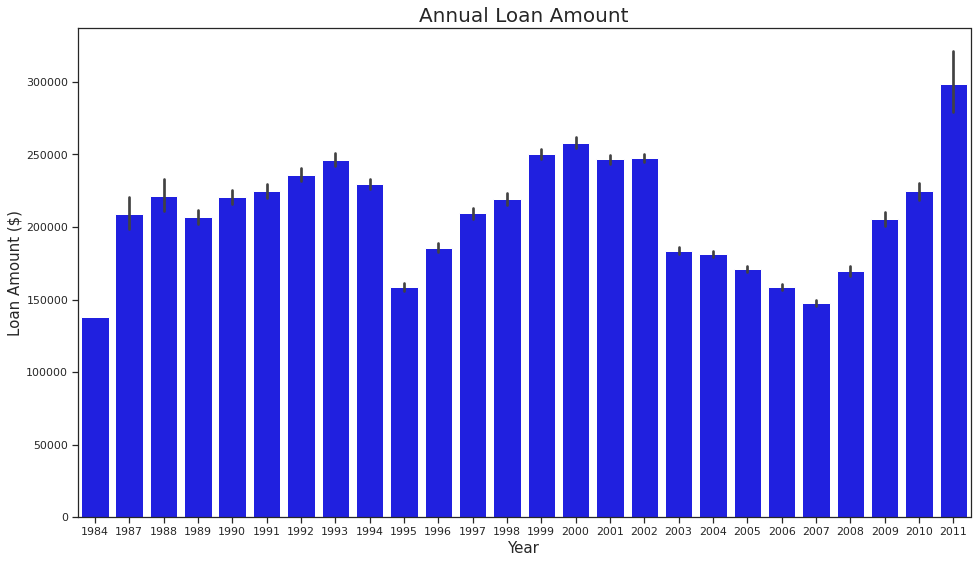

In [ ]:
f, ax = plt.subplots(figsize=(16,9))
sns.barplot(x="ApprovalFY", y="DisbursementGross", color='blue', data=df)
plt.title('Annual Loan Amount', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Loan Amount ($)', fontsize=15)

- The graph above is the amount of loans that banks give each year to entrepreneurs. 
  - It can be seen that there were several declines in 1994 and 2007. 
  - This is because in those years experienced a global crisis, so that banks would reduce lending to entrepreneurs. 
- For an average annual loan of 190,000–200,000. Let's take a more detailed look by sector.

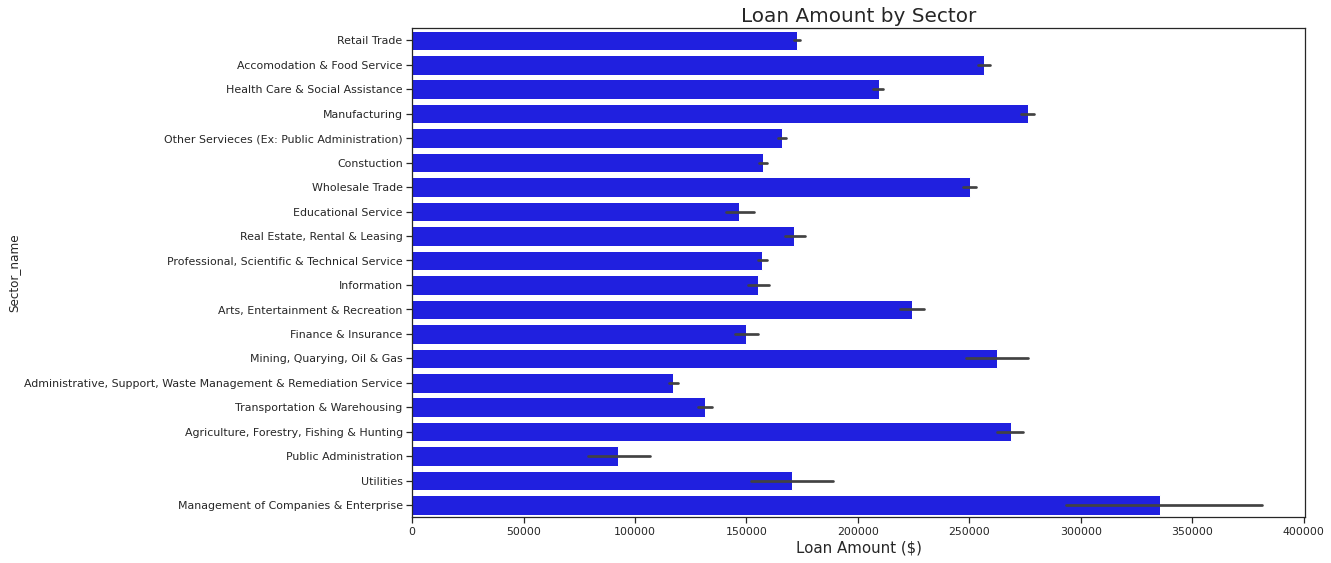

In [ ]:

f, ax = plt.subplots(figsize=(16,9))
sns.barplot(x="DisbursementGross", y="Sector_name", data=df, color='blue')
plt.title('Loan Amount by Sector', fontsize=20)
plt.xlabel('Loan Amount ($)', fontsize=15);

In [ ]:
df.groupby('Sector_name')['DisbursementGross'].describe().style.highlight_max(color='red').highlight_min(color='blue')

- As we can see in the graph and table above, **the most people who get loans are the Management Of Companies & Enterprise sector and the lowest is the Public Administration**. 
- The highest amount of data is in the Retail Trade sector and the least is in the Public Administration sector, so that for further analysis, the biggest and smallest possibilities on each chart are the two sectors.

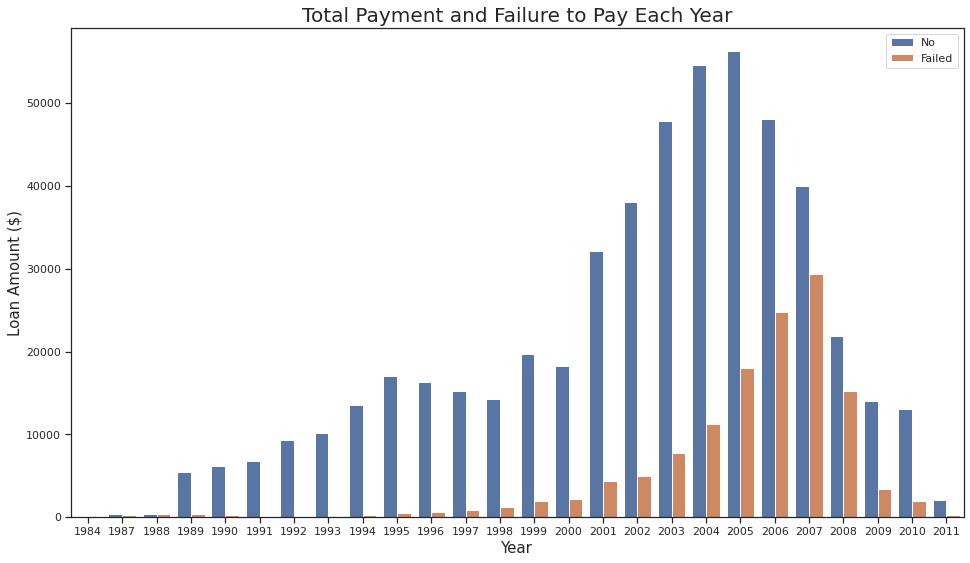

In [ ]:
#See the amount you pay and fail to pay each year
f, ax = plt.subplots(figsize=(16,9))
sns.countplot(x="ApprovalFY", data=df,hue='MIS_Status')
plt.title('Total Payment and Failure to Pay Each Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Loan Amount ($)', fontsize=15)
plt.legend(["No", "Failed"],loc='upper right')

- We can see that there was an increase in defaults from 2006-2008, this was in accordance with the current world economic situation which was experiencing a global recession, so that many entrepreneurs or businesses found it difficult to make payments.

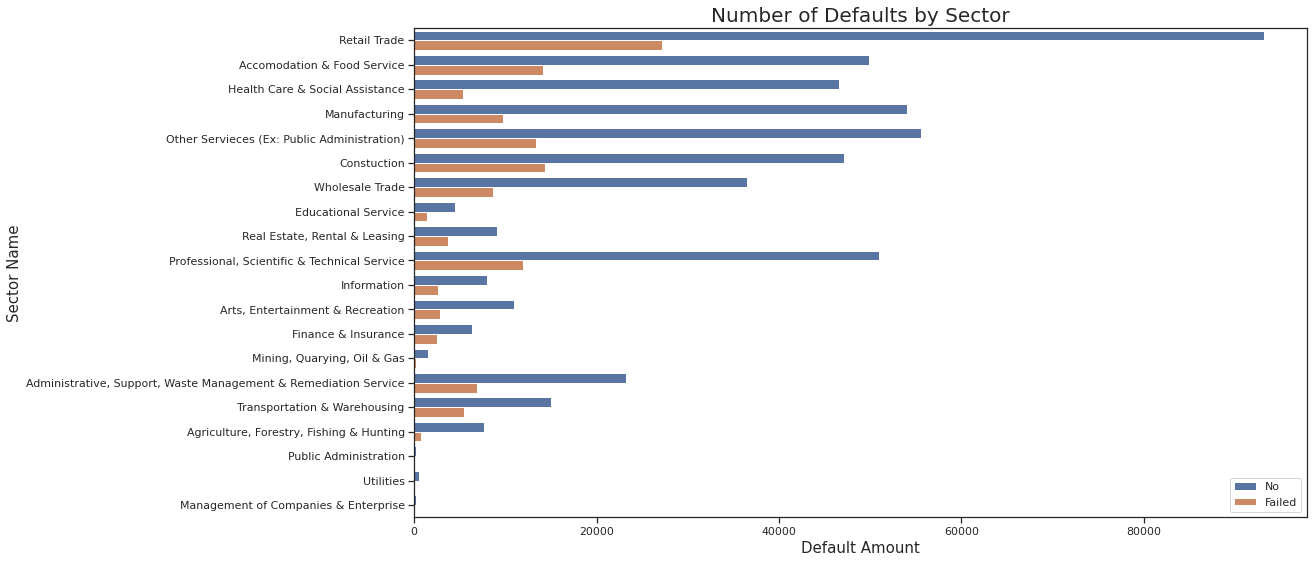

In [ ]:
#See the amount paid & failed to pay in each sector
f, ax = plt.subplots(figsize=(16,9))
sns.countplot(y="Sector_name", hue="MIS_Status", data=df)
plt.title('Number of Defaults by Sector', fontsize=20)
plt.xlabel('Default Amount', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.legend(["No", "Failed"],loc='lower right')

In [ ]:
pd.DataFrame(df.groupby('Sector_name')['MIS_Status'].value_counts()).unstack(level=1).style.highlight_max(color='red').highlight_min(color='blue')

- As we know, the most data is Retail Trade, so the sector that is the most good at paying and defaulting is that sector.

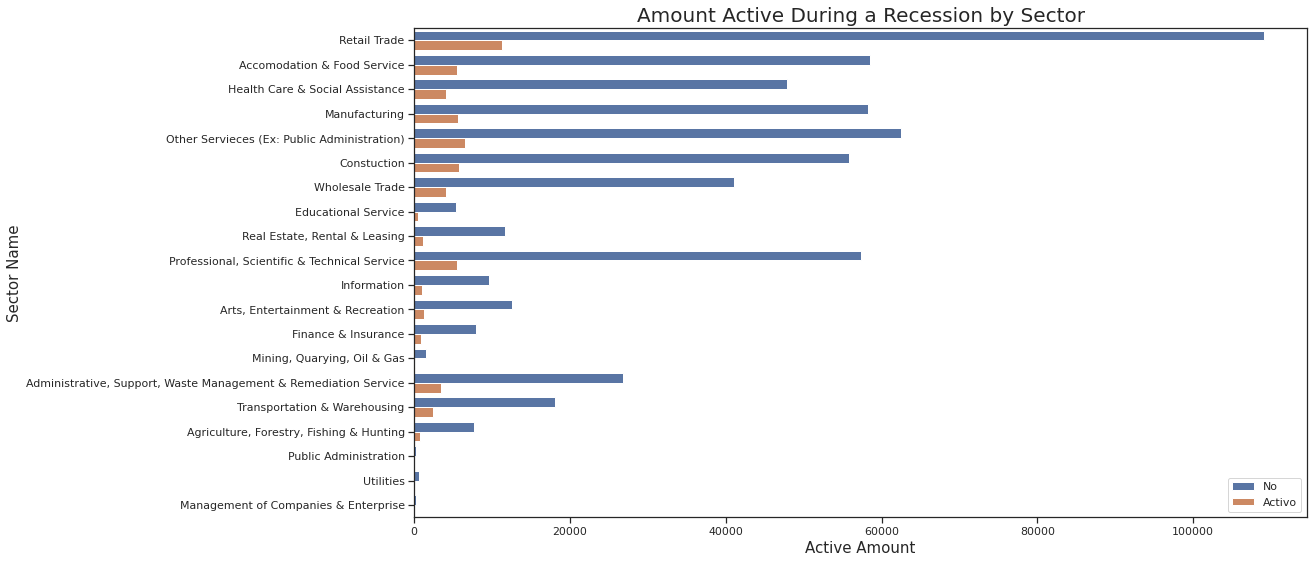

In [ ]:
# Plot the sectors that were active during the 2008 global recession
f, ax = plt.subplots(figsize=(16,9))
sns.countplot(y="Sector_name", hue="Recession", data=df)
plt.title('Amount Active During a Recession by Sector', fontsize=20)
plt.xlabel('Active Amount', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.legend(["No", "Activo"],loc='lower right')

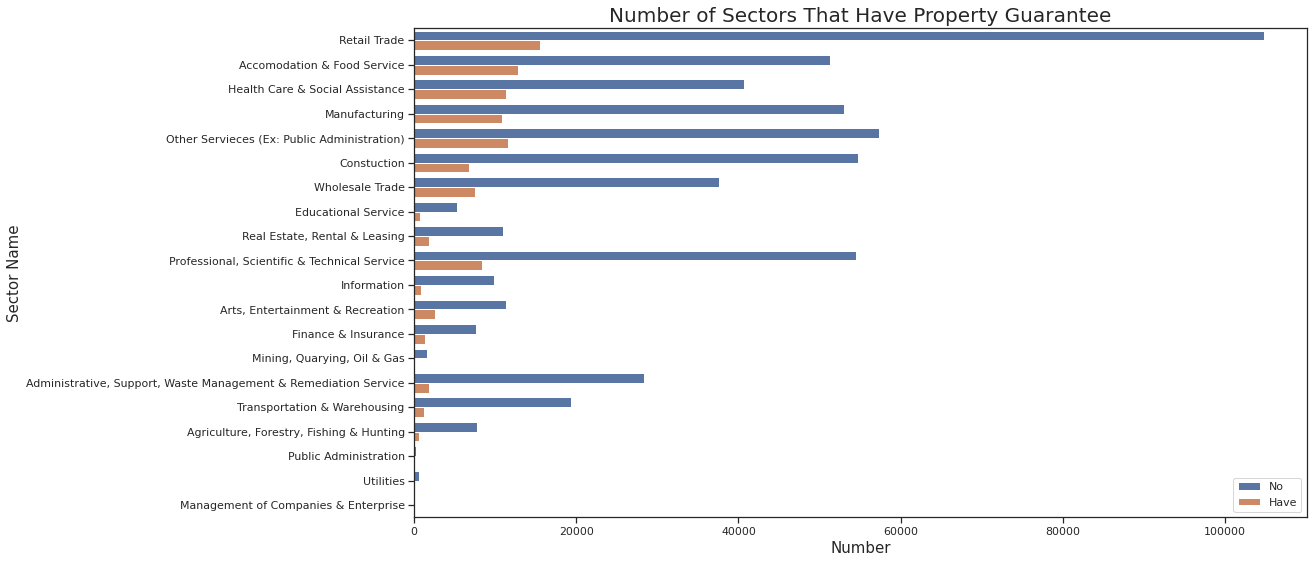

In [ ]:
# Look at which sectors have property collateral
f, ax = plt.subplots (figsize = (16,9))
sns.countplot (y = "Sector_name", hue = "RealEstate", data = df)
plt.title ('Number of Sectors That Have Property Guarantee', fontsize = 20)
plt.xlabel ('Number', fontsize = 15)
plt.ylabel ('Sector Name', fontsize = 15)
plt.legend (["No", "Have"], loc = 'lower right')
plt.show ()

In [ ]:
# See in more detail the sectors with property guarantees

pd.DataFrame(df.groupby('Sector_name')['RealEstate'].value_counts()).unstack(level=1).style.highlight_max(color='red').highlight_min(color='blue')

Text(0.5, 0, 'Month')

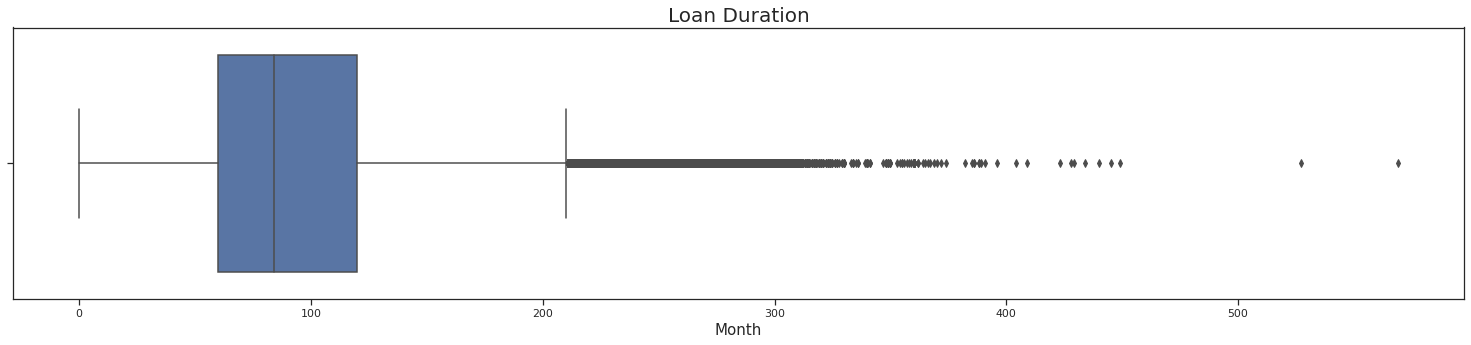

In [ ]:
# Look at the length of the loan
f, ax = plt.subplots(figsize=(26,5))
sns.boxplot(df['Term'])
plt.title('Loan Duration', fontsize=20)
plt.xlabel('Month', fontsize=15)

In [ ]:
#See loan details
df['Term'].describe()

count    652758.000000
mean        104.205191
std          75.412360
min           0.000000
25%          60.000000
50%          84.000000
75%         120.000000
max         569.000000
Name: Term, dtype: float64

Text(0, 0.5, 'Sector')

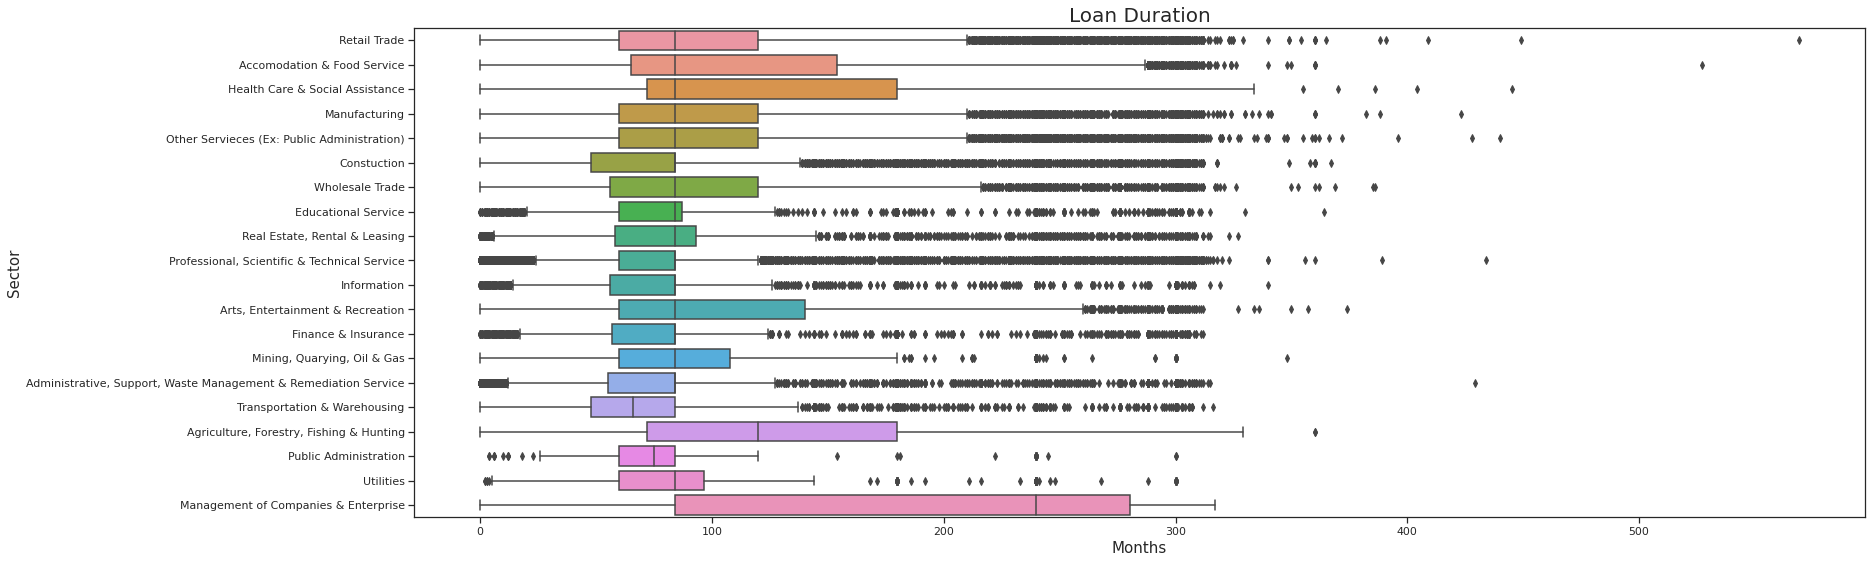

In [ ]:

f, ax = plt.subplots(figsize=(26,9))
sns.boxplot(x="Term", y="Sector_name", data=df)
plt.title('Loan Duration', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Sector', fontsize=15)

In [ ]:
#Lending details by sector
df.groupby('Sector_name')['Term'].describe().sort_values(by="mean").style.highlight_max(color='red').highlight_min(color='blue')

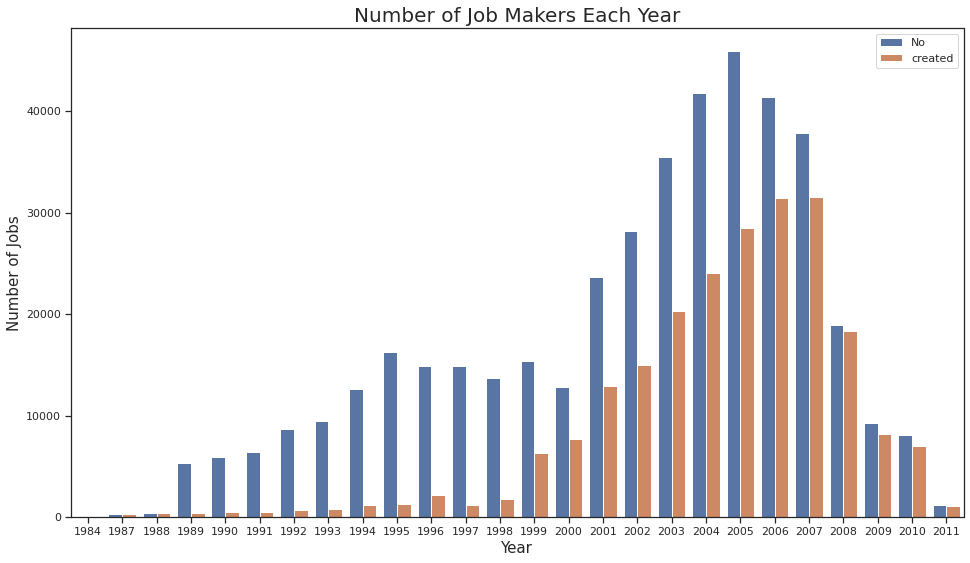

In [ ]:
# See the number of working fields every year
f, ax = plt.subplots(figsize=(16,9))
sns.countplot(x="ApprovalFY", data=df,hue='Is_CreatedJob')
plt.title('Number of Job Makers Each Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Jobs', fontsize=15)
plt.legend(["No", "created"],loc='upper right')

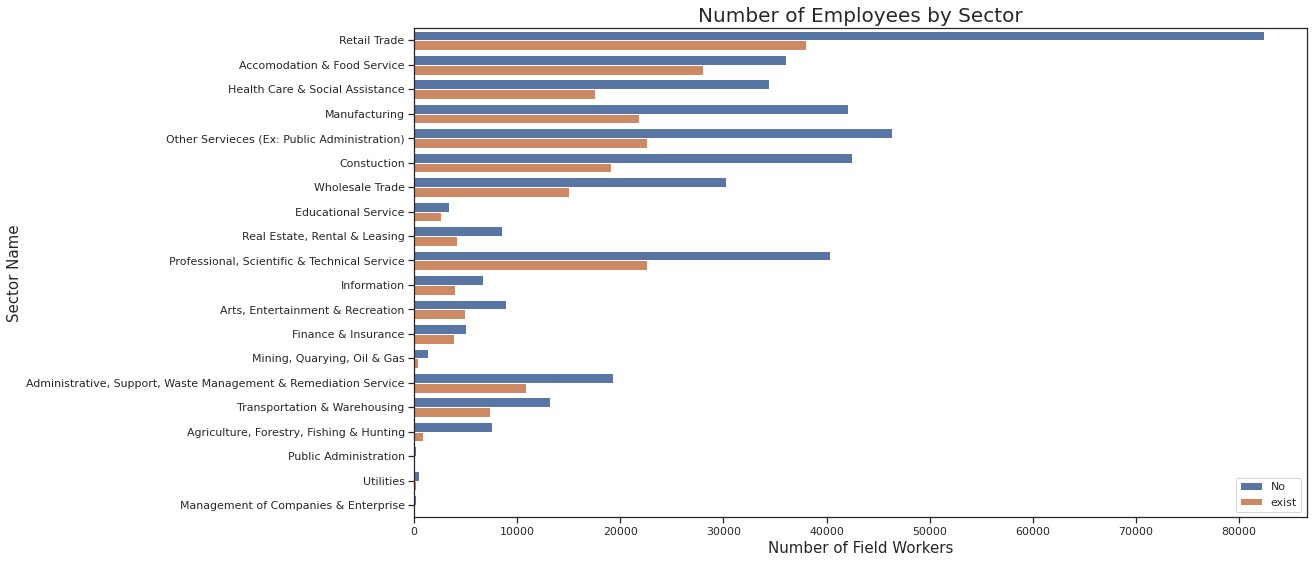

In [ ]:
#Number of employment by sector
f, ax = plt.subplots(figsize=(16,9))
sns.countplot(y="Sector_name", hue="Is_CreatedJob", data=df)
plt.title('Number of Employees by Sector', fontsize=20)
plt.xlabel('Number of Field Workers', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.legend(["No", "exist"],loc='lower right')

In [ ]:
#Details of each sector of employment
pd.DataFrame(df.groupby('Sector_name')['Is_CreatedJob'].value_counts()).unstack(level=1).style.highlight_max(color='red').highlight_min(color='blue')

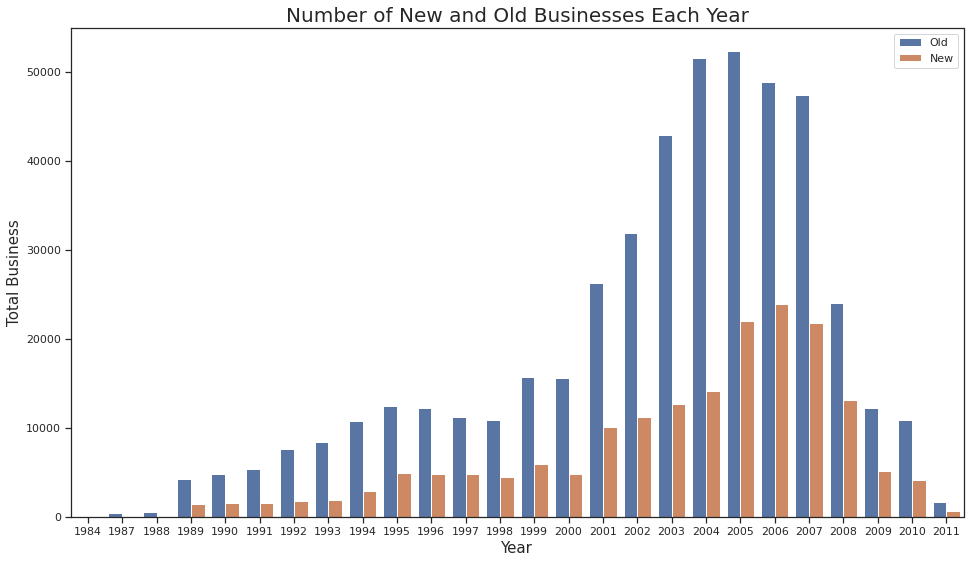

In [ ]:
#View the number of new and existing businesses that join the SBA each year
f, ax = plt.subplots(figsize=(16,9))
sns.countplot(x="ApprovalFY", data=df,hue='NewExist')
plt.title('Number of New and Old Businesses Each Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Business', fontsize=15)
plt.legend(["Old", "New"],loc='upper right')

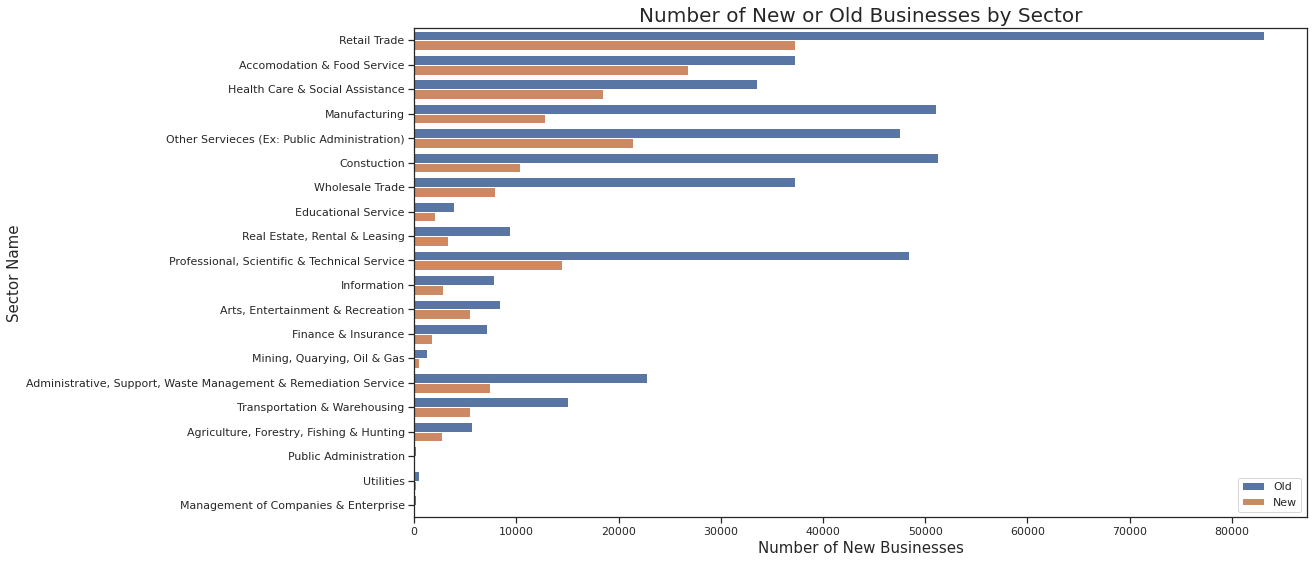

In [ ]:

f, ax = plt.subplots(figsize=(16,9))
sns.countplot(y="Sector_name", hue="NewExist", data=df)
plt.title('Number of New or Old Businesses by Sector', fontsize=20)
plt.xlabel('Number of New Businesses', fontsize=15)
plt.ylabel('Sector Name', fontsize=15)
plt.legend(["Old", "New"],loc='lower right')

In [ ]:
#Details The number of new and old businesses by sector
pd.DataFrame(df.groupby('Sector_name')['NewExist'].value_counts()).unstack(level=1).style.highlight_max(color='red').highlight_min(color='blue')

### Target Variable

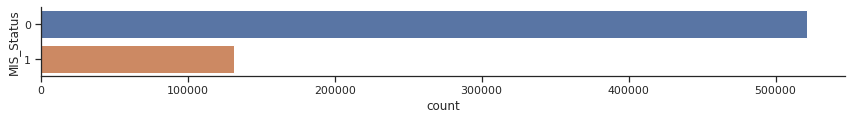

In [ ]:
ax = sns.catplot(y="MIS_Status", kind="count", data=df, height=1.6, aspect=7.5, orient='h')

### Numerical features
There are five numerical columns: 
- DisbursementGross 
- BalanceGross
- ChgOffPrinGr
- GrAppv
- SBA_Appv


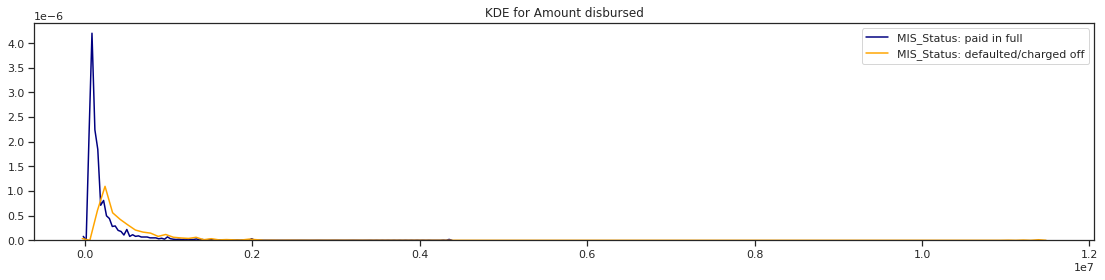

In [ ]:
def kdeplot(feature,title):
    plt.figure(figsize=(19, 4))
    plt.title("KDE for {}".format(title))
    ax0 = sns.kdeplot(df[df['MIS_Status'] == 1][feature].dropna(), color= 'navy', label= 'MIS_Status: paid in full')
    ax1 = sns.kdeplot(df[df['MIS_Status'] == 0][feature].dropna(), color= 'orange', label= 'MIS_Status: defaulted/charged off')
kdeplot('DisbursementGross','Amount disbursed')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


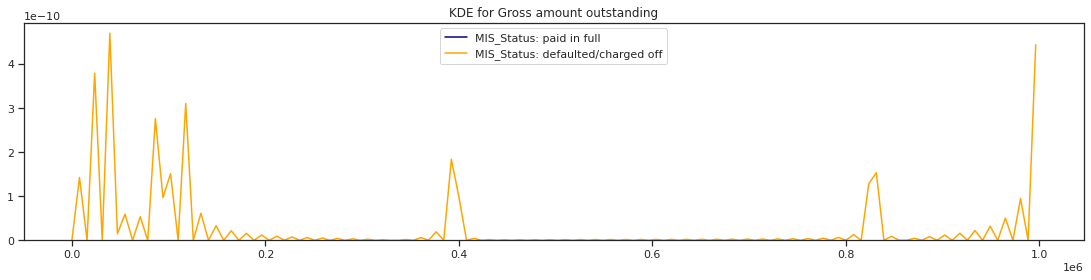

In [ ]:
kdeplot('BalanceGross','Gross amount outstanding')


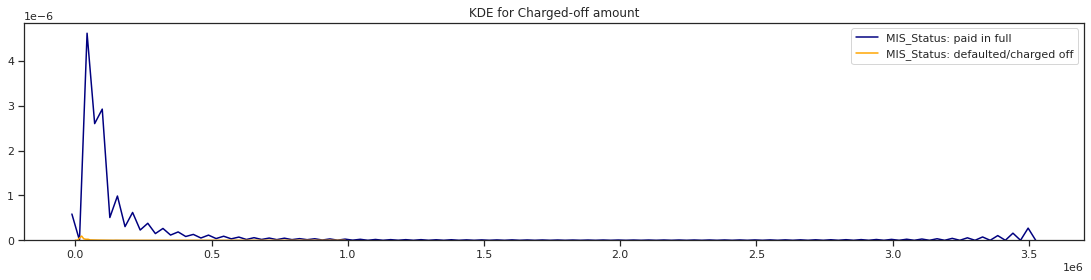

In [ ]:
kdeplot('ChgOffPrinGr','Charged-off amount')


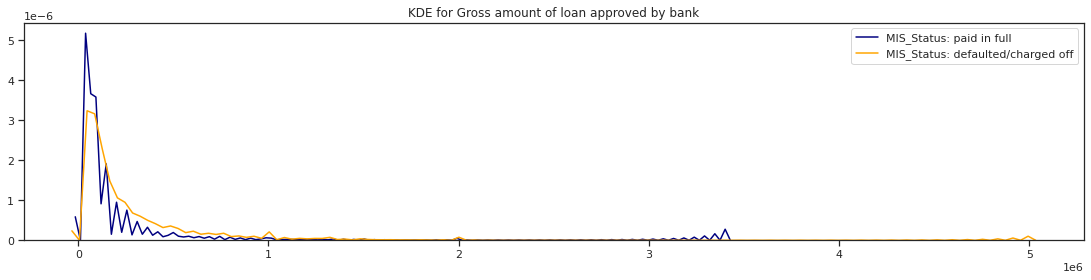

In [ ]:
kdeplot('GrAppv','Gross amount of loan approved by bank')


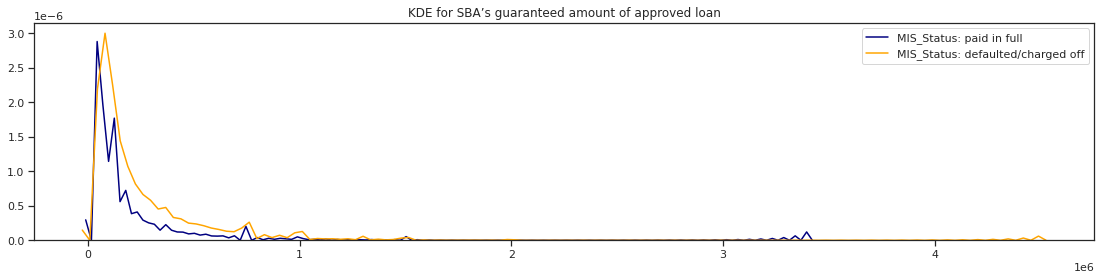

In [ ]:
kdeplot('SBA_Appv','SBA’s guaranteed amount of approved loan')


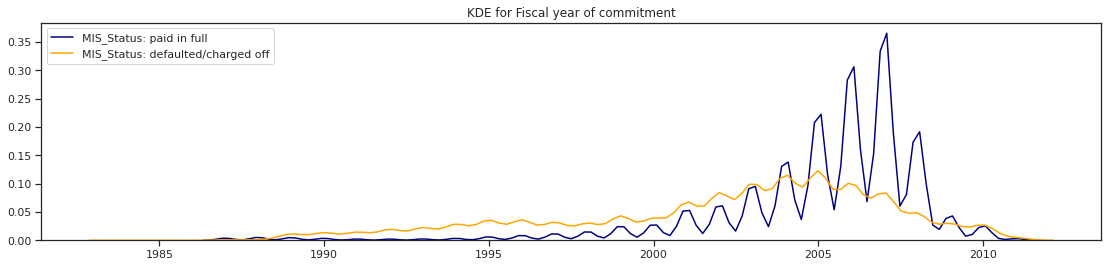

In [ ]:
kdeplot('ApprovalFY','Fiscal year of commitment')


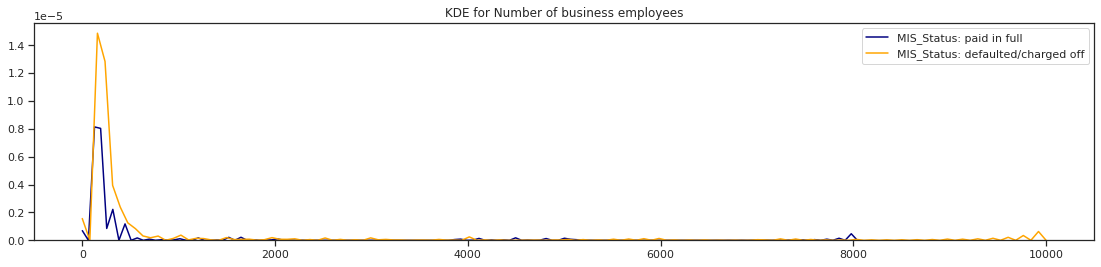

In [ ]:
kdeplot('NoEmp','Number of business employees')

From the plots above we can conclude that:

In fact we can see some boundaries when we use scatter plots:

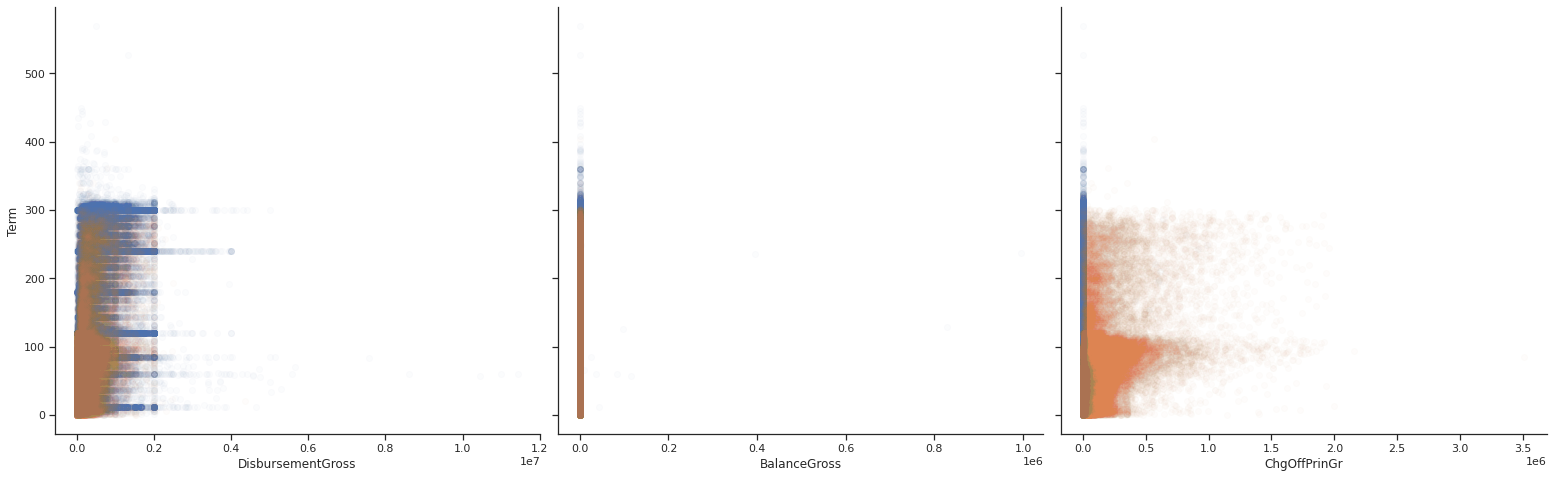

In [ ]:
g = sns.PairGrid(
    df, 
    y_vars=["Term"], 
    x_vars=["DisbursementGross", "BalanceGross","ChgOffPrinGr"], 
    height=6.5, hue="MIS_Status", aspect=1.1 )
ax = g.map(plt.scatter, alpha=0.02)

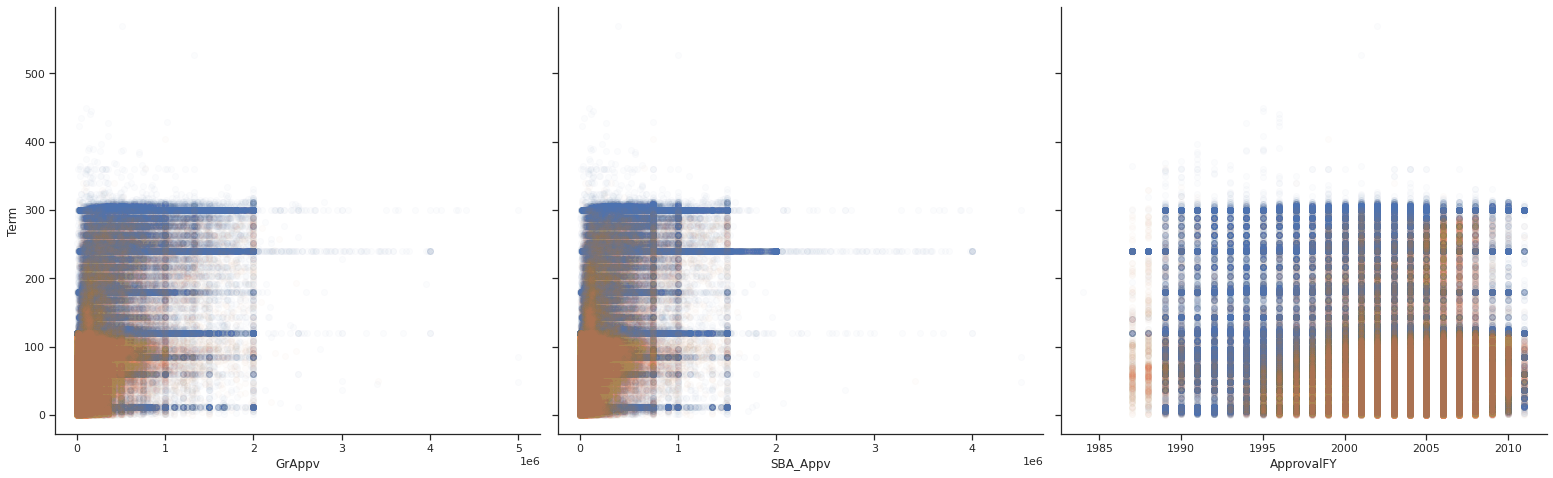

In [ ]:
g = sns.PairGrid(
    df, 
    y_vars=["Term"], 
    x_vars=["GrAppv","SBA_Appv","ApprovalFY"], 
    height=6.5, hue="MIS_Status", aspect=1.1 )
ax = g.map(plt.scatter, alpha=0.02)

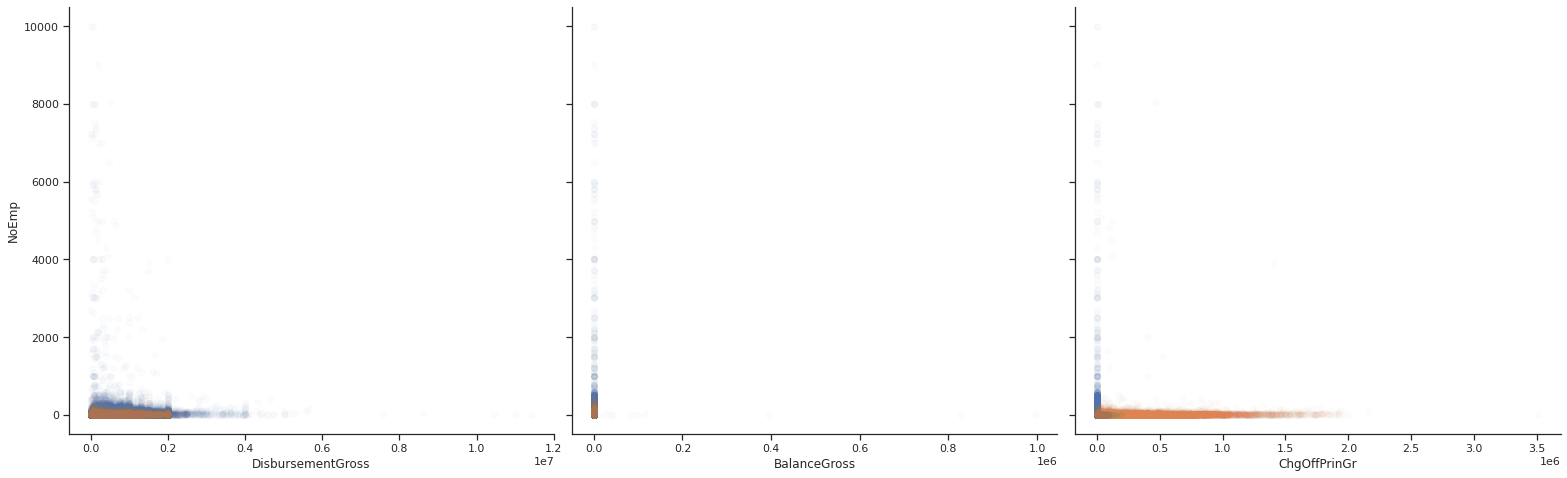

In [ ]:
g = sns.PairGrid(
    df, 
    y_vars=["NoEmp"], 
    x_vars=["DisbursementGross", "BalanceGross","ChgOffPrinGr"], 
    height=6.5, hue="MIS_Status", aspect=1.1 )
ax = g.map(plt.scatter, alpha=0.02)

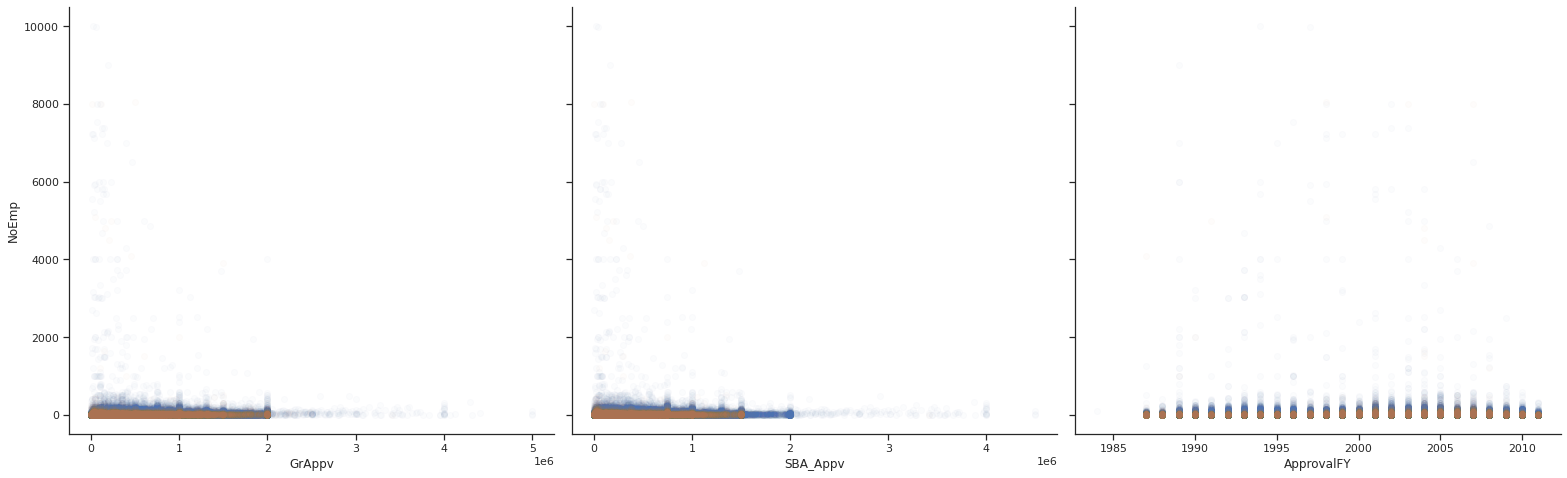

In [ ]:
g = sns.PairGrid(
    df, 
    y_vars=["NoEmp"], 
    x_vars=["GrAppv","SBA_Appv","ApprovalFY"], 
    height=6.5, hue="MIS_Status", aspect=1.1 )
ax = g.map(plt.scatter, alpha=0.02)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


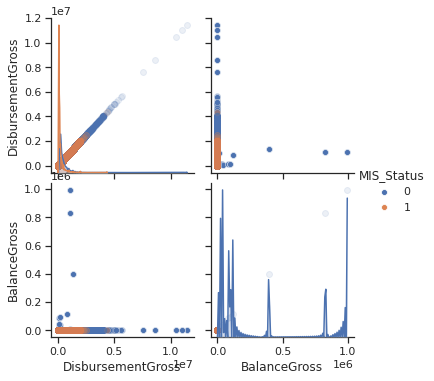

In [ ]:
g = sns.pairplot(df, hue="MIS_Status", vars=["DisbursementGross", "BalanceGross"])
ax = g.map(plt.scatter, alpha=0.1)

### Categorical features
This dataset has 16 categorical features:

- 6 binary features (Yes/No)
- 9 features with three unique values each (categories)
- 1 feature with four unique values

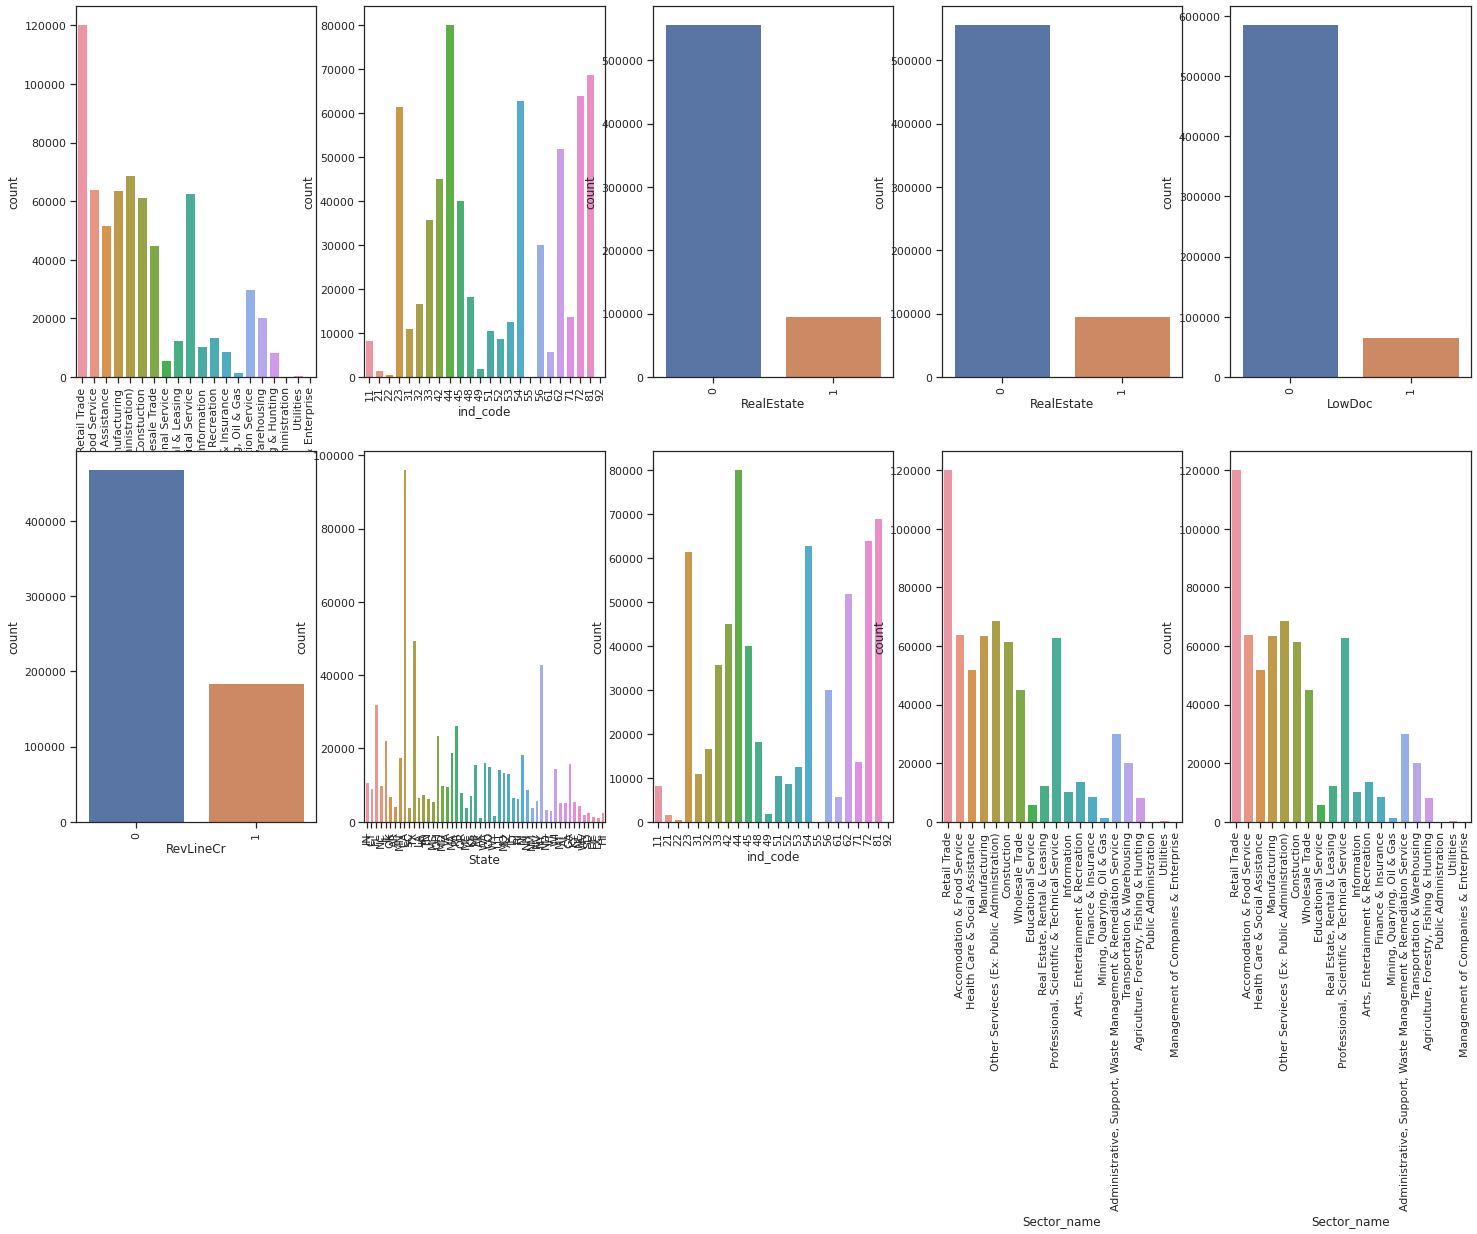

In [ ]:
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,15))
ax = sns.countplot(x = "Sector_name", data = df, ax=axes[0][0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "ind_code", data = df, ax=axes[0][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "RealEstate", data = df, ax=axes[0][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "RealEstate", data = df, ax=axes[0][3])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "LowDoc", data = df, ax=axes[0][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "RevLineCr", data = df, ax=axes[1][0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "State", data = df, ax=axes[1][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "ind_code", data = df, ax=axes[1][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "Sector_name", data = df, ax=axes[1][3])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.countplot(x = "Sector_name", data = df, ax=axes[1][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show(fig)

#### Percentage Loans by Sector

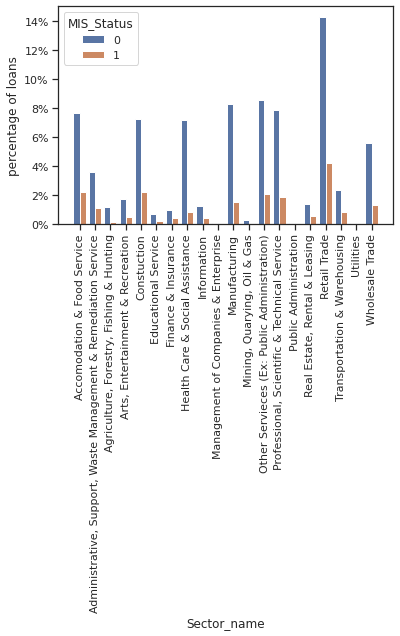

In [ ]:
def barplot_percentages(feature, orient='v', axis_name="percentage of loans"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["MIS_Status"].value_counts().to_frame()
    g = g.rename({"MIS_Status": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='MIS_Status', data=g)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='MIS_Status', data=g)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax.plot()
barplot_percentages("Sector_name")

# Preparing Data


## Handling Outliers

we will remove the columns which are deemed unimportant
- The LoanNr_ChkDgt column is not important because only the ID of the borrower has been replaced by index
- The City, State, UrbanRural and ZIP columns are unnecessary because we have changed them to the state rate
- bank column and bank satet are also not very important
- The NAICS column has been replaced with Sector_rate
- ApprovalDate and ApprovalFY columns because they only record the date
- Term column is deleted because it has been replaced with RealEstate
- UrbanRural column because it doesn't affect the target
- LowDoc column because there is already a Gross Disbursement, LowDoc is only grouped administratively
- Active and DaysTerm columns because they have been replaced with Recession
- column ind_code because there is already a Secator_rate
- column ChgOffDate because it is equal to MIS_Status
- DisbursementDate column because it is only a payment account
- column SBA_Appv because it has been replaced with Portion_SBA_Bank
- The DisbursementDate column is deprecated
- The Sector_name column has been deprecated

In [ ]:
df = df.drop(axis =1, columns = ['LoanNr_ChkDgt','City','State', 'Zip', 'UrbanRural', 'LowDoc',
                                    'ApprovalDate', 'ApprovalFY', 'SBA_Appv','DisbursementDate', 
                                     'Sector_name','BalanceGross', 'ChgOffPrinGr'])

#### We will use Interquartile Range to handle outliers
Determining the limit

In [ ]:
def limit(i):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # specifies the usual upper limit and the extreme upper limit
    lower_limit = df[i].quantile(0.25) - (IQR * 1.5)
    lower_limit_extreme = df[i].quantile(0.25) - (IQR * 3)
    upper_limit = df[i].quantile(0.75) + (IQR * 1.5)
    upper_limit_extreme = df[i].quantile(0.75) + (IQR * 3)
    print('Lower Limit:', lower_limit)
    print('Lower Limit Extreme:', lower_limit_extreme)
    print('Upper Limit:', upper_limit)
    print('Upper Limit Extreme:', upper_limit_extreme)

   
def percent_outliers(i):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # specifies the usual upper limit and the extreme upper limit
    lower_limit = df[i].quantile(0.25) - (IQR * 1.5)
    lower_limit_extreme = df[i].quantile(0.25) - (IQR * 3)
    upper_limit = df[i].quantile(0.75) + (IQR * 1.5)
    upper_limit_extreme = df[i].quantile(0.75) + (IQR * 3)
  #View percentages of outliers to total data
    print('Lower Limit: {} %'.format(df[(df[i] >= lower_limit)].shape[0]/ df.shape[0]*100))
    print('Lower Limit Extereme: {} %'.format(df[(df[i] >= lower_limit_extreme)].shape[0]/df.shape[0]*100))
    print('Upper Limit: {} %'.format(df[(df[i] >= upper_limit)].shape[0]/ df.shape[0]*100))
    print('Upper Limit Extereme: {} %'.format(df[(df[i] >= upper_limit_extreme)].shape[0]/df.shape[0]*100))

#### We check the DisbursemntGross column

Text(0.5, 0, 'Total')

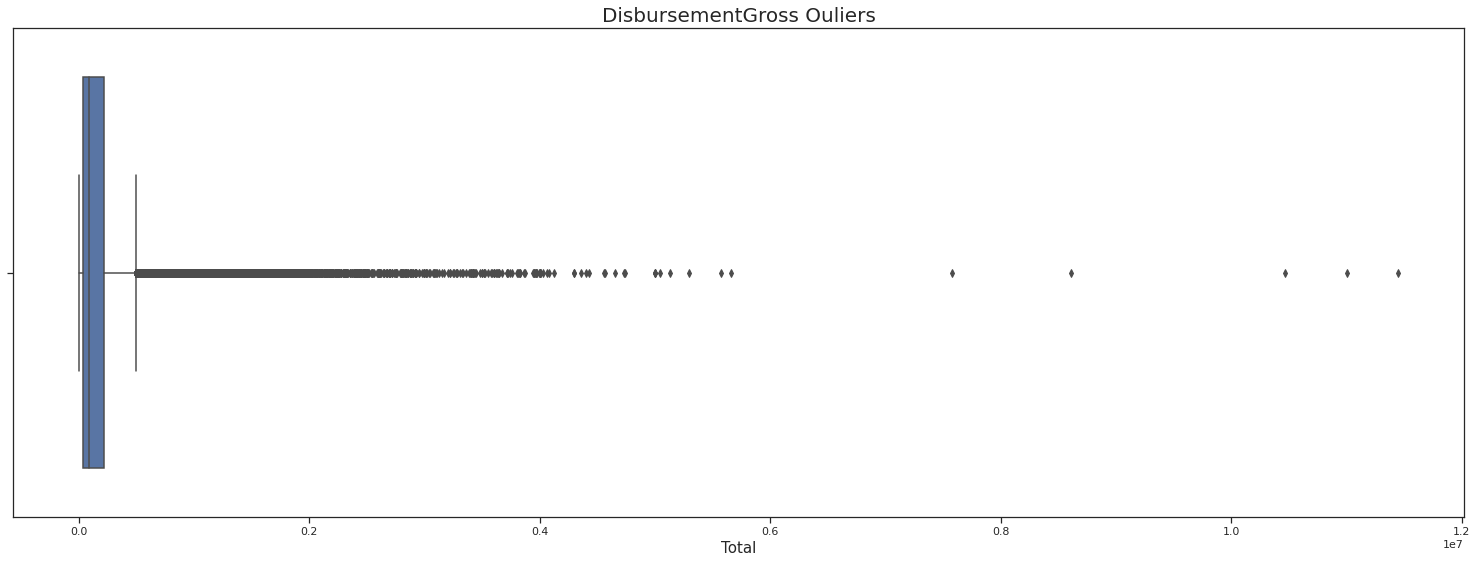

In [ ]:

f, ax = plt.subplots(figsize=(26,9))
sns.boxplot(x=df['DisbursementGross'])
plt.title('DisbursementGross Outliers', fontsize=20)
plt.xlabel('Total', fontsize=15)

#### we will check the limit outliers and what percentage of our data exceeds that limit


In [ ]:
print(limit('DisbursementGross'))
print('-'*50)
print(percent_outliers('DisbursementGross'))

Lower Limit: -236266.875
Lower Limit Extreme: -510027.0
Upper Limit: 493760.125
Upper Limit Extreme: 767520.25
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 10.37919106315051 %
Upper Limit Extereme: 4.927553549707548 %
None


because there is 10% of the amount of data we have, so I try to change the data using log transformation, because if the ouliers are removed a lot of data is lost (10%)

In [ ]:
df['DisbursementGross'] = np.log(df['DisbursementGross'])
df['DisbursementGross'].skew()

-0.008611788601431542

In [ ]:
print(limit('DisbursementGross'))
print('-'*50)
print(percent_outliers('DisbursementGross'))

Lower Limit: 7.87771625122292
Lower Limit Extreme: 5.223516306755974
Upper Limit: 14.955582769801445
Upper Limit Extreme: 17.60978271426839
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 0.015932397611365928 %
Upper Limit Extereme: 0.0 %
None


It turns out that there are still around 1% outliers, because the number is relatively small, so we just drop it

In [ ]:

outliers1_drop = df[(df['DisbursementGross'] > 14.9)].index
df.drop(outliers1_drop, inplace=True)

we check again if there are still outliers

Text(0.5, 0, 'Total')

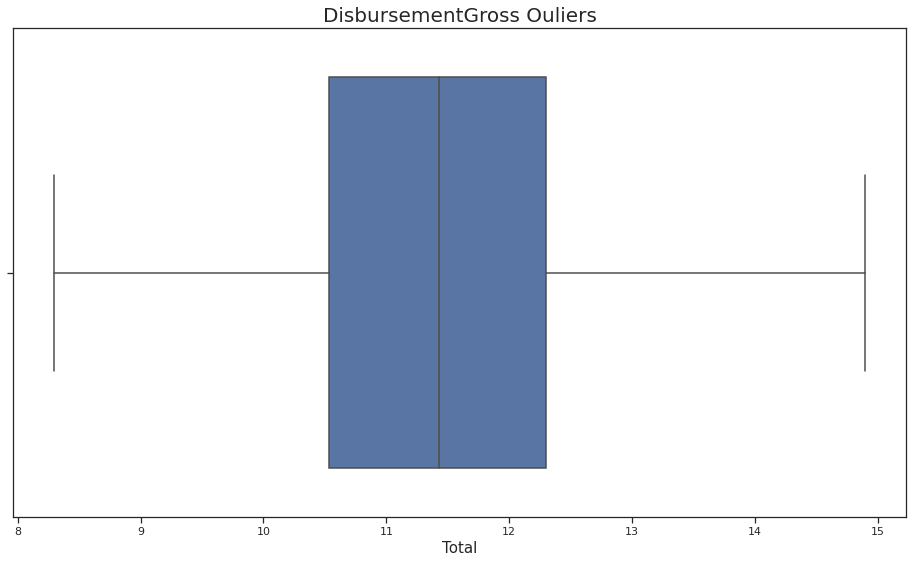

In [ ]:

f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df['DisbursementGross'])
plt.title('DisbursementGross Ouliers', fontsize=20)
plt.xlabel('Total', fontsize=15)

#### We check the GrAppv column for outliers

Text(0.5, 0, 'Total')

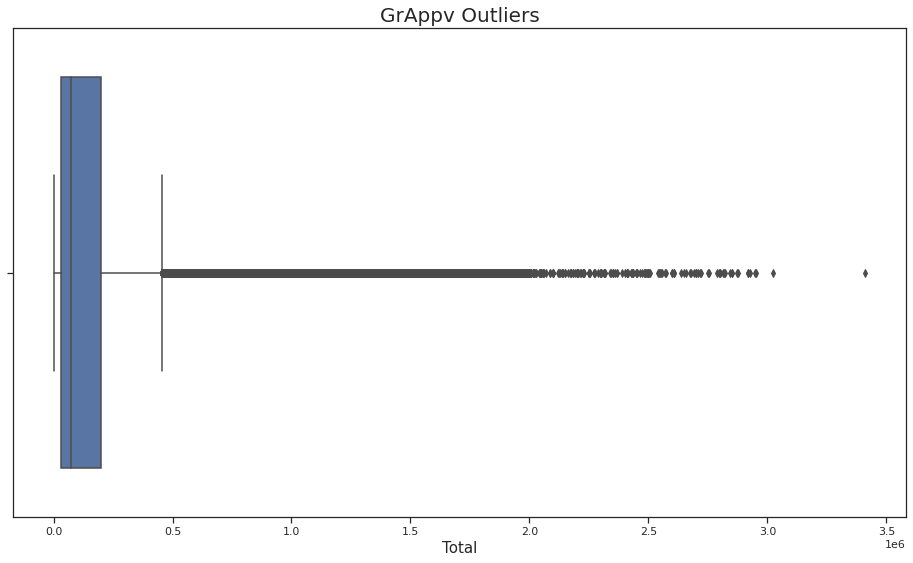

In [ ]:

f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df['GrAppv'])
plt.title('GrAppv Outliers', fontsize=20)
plt.xlabel('Total', fontsize=15)

we will check the limit outliers and what percentage of our data exceeds that limit

In [ ]:
#
print(limit('GrAppv'))
print('-'*50)
print(percent_outliers('GrAppv'))

Lower Limit: -225000.0
Lower Limit Extreme: -480000.0
Upper Limit: 455000.0
Upper Limit Extreme: 710000.0
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 10.87991125194213 %
Upper Limit Extereme: 5.638841984941024 %
None


In [ ]:
df['GrAppv'] = np.log(df['GrAppv'])
df['GrAppv'].skew()

0.0819495290341257

we will check the limit outliers and what percentage of our data exceeds that limit

In [ ]:
#
print(limit('GrAppv'))
print('-'*50)
print(percent_outliers('GrAppv'))

Lower Limit: 7.463272683315471
Lower Limit Extreme: 4.617592705986649
Upper Limit: 15.051752622858995
Upper Limit Extreme: 17.89743260018782
None
--------------------------------------------------
Lower Limit: 99.98973390905162 %
Lower Limit Extereme: 100.0 %
Upper Limit: 0.0 %
Upper Limit Extereme: 0.0 %
None


it turns out that there are still about 1% outliers, because the number is relatively small, so we just drop it

In [ ]:
#
outliers2_drop = df[(df['GrAppv'] < 7.5)].index
df.drop(outliers2_drop, inplace=True)

we check again in the GrAppv column if there are still outliers

Text(0.5, 0, 'Total')

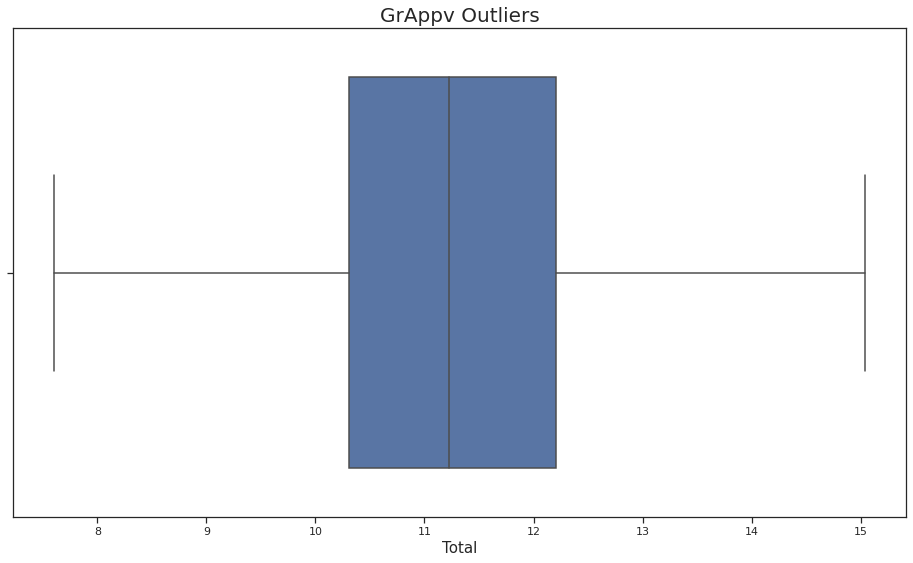

In [ ]:
#
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df['GrAppv'])
plt.title('GrAppv Outliers', fontsize=20)
plt.xlabel('Total', fontsize=15)

#### we check outliers on column Nop

Text(0.5, 0, 'Total')

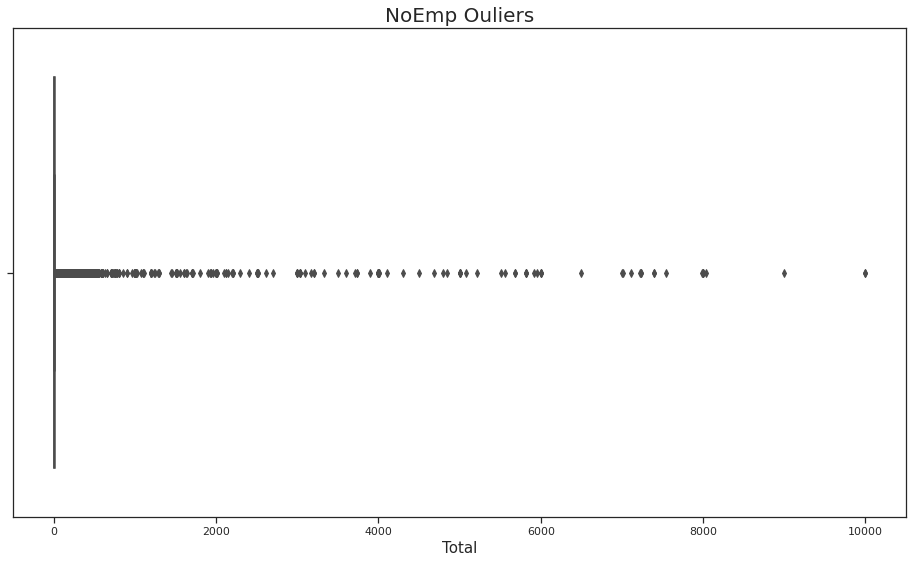

In [ ]:
#
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df['NoEmp'])
plt.title('NoEmp Ouliers', fontsize=20)
plt.xlabel('Total', fontsize=15)

we will check the limit outliers and what percentage of our data exceeds that limit

In [ ]:

print(limit('NoEmp'))
print('-'*50)
print(percent_outliers('NoEmp'))

Lower Limit: -8.5
Lower Limit Extreme: -19.0
Upper Limit: 19.5
Upper Limit Extreme: 30.0
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 11.139545824413432 %
Upper Limit Extereme: 6.300962200049956 %
None


In the NoEmp column, there is iput 0, aka I think it's an error, input, because it can't be a company have no employees

In [ ]:

wrong_input = df[(df['NoEmp'] == 0)].index
df.drop(wrong_input, inplace=True)

I did the boxcox transformation because I tried all the methods I tried but this was the best result

In [ ]:
#
df['NoEmp']= stats.boxcox(df['NoEmp'])[0]

In [ ]:
df['NoEmp'].skew()

0.06760933895463629

we will check the limit outliers again and what percentage of our data exceeds that limit

In [ ]:
#
print(limit('NoEmp'))
print('-'*50)
print(percent_outliers('NoEmp'))

Lower Limit: -0.9932721827900441
Lower Limit Extreme: -2.6280785170327055
Upper Limit: 3.366211375190386
Upper Limit Extreme: 5.0010177094330475
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 0.02981072506479585 %
Upper Limit Extereme: 0.0 %
None


it turns out there are still around 0.02% outliers, because the number is relatively small, so we just drop it

In [ ]:

outliers3_drop = df[(df['NoEmp'] > 3.3)].index
df.drop(outliers3_drop, inplace=True)

we check outliers again in column nop

Text(0.5, 0, 'Total')

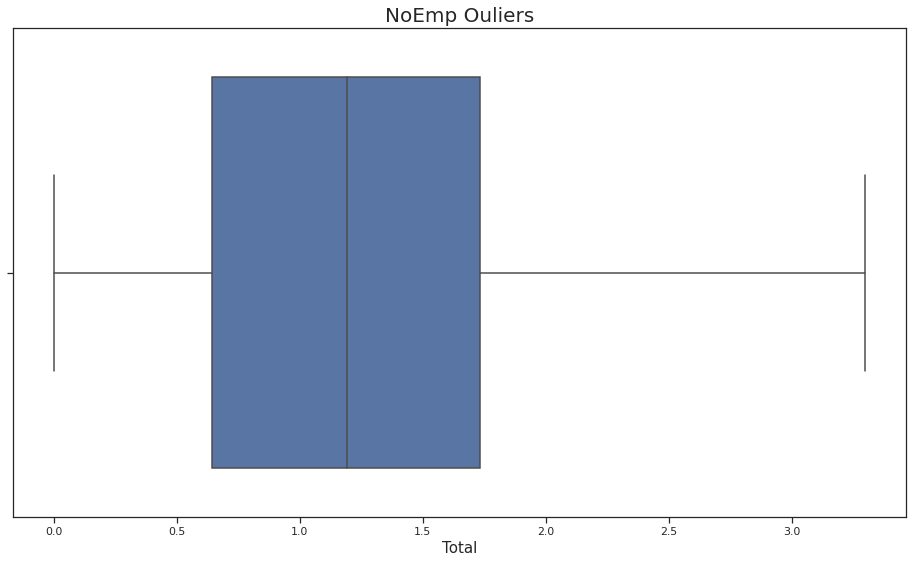

In [ ]:
#
f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df['NoEmp'])
plt.title('NoEmp Ouliers', fontsize=20)
plt.xlabel('Total', fontsize=15)

#### we check the ouliers in the Term column

Text(0.5, 0, 'Month')

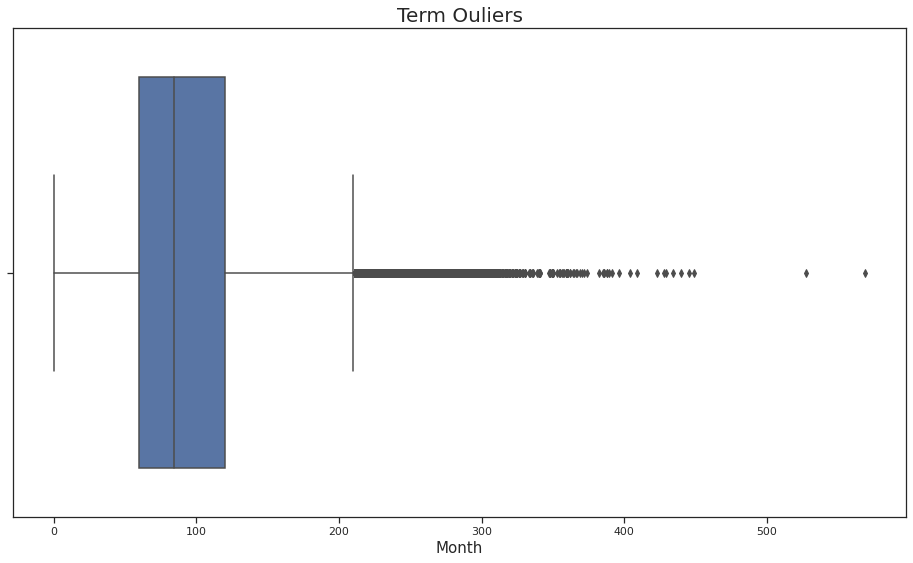

In [ ]:

f, ax = plt.subplots(figsize=(16,9))
sns.boxplot(x=df['Term'])
plt.title('Term Ouliers', fontsize=20)
plt.xlabel('Month', fontsize=15)

- Because there is data with a length of 0 months and 43 years,because there is no time 0 and 569 months (43 years)
- While the data collection we have is only from 1987–2010 (23 years),
so a minimum of 5 years (75 months) or a maximum of 23 years (276 months)

In [ ]:

wrong_input_2 = df[(df['Term'] < 75)].index
wrong_input_3 = df[(df['Term'] > 276)].index
df.drop(wrong_input_2, inplace=True)
df.drop(wrong_input_3, inplace=True)

we will check the outliers limit again and what percentage of our data exceeds that limit

In [ ]:

print(limit('Term'))
print('-'*50)
print(percent_outliers('Term'))

Lower Limit: 16.5
Lower Limit Extreme: -51.0
Upper Limit: 196.5
Upper Limit Extreme: 264.0
None
--------------------------------------------------
Lower Limit: 100.0 %
Lower Limit Extereme: 100.0 %
Upper Limit: 18.052034231237986 %
Upper Limit Extereme: 1.071246341714893 %
None


we will not drop these outliers, because apart from the large number (18%) this is not necessarily the wrong input, because in some industries can take long loan terms such as oil & gas or mining

### Feature Importance


At this stage, we will select or find which features are most relevant to our target. I have tried using KBest and Feature Importance and I also didn't use correlation coefficients because of the target variable and there are several categorical independent variables. However, after being put into the model the best is Fetaure Importance.

- Because data has a very large number of inputs, then I will use a technique of feature importance for fetaure selection
- We will first separate the independent and feature dependent reset the index first so that the index is sorted




In [ ]:
df = df.drop(axis=1, columns=['Name','Bank','NAICS', 'BankState',
                                  'ChgOffDate','ind_code', 'Active', 'DaysTerm'])

In [ ]:

y = df['MIS_Status']
X = df.drop(columns=['MIS_Status'], axis=1)



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378251 entries, 0 to 899161
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Term               378251 non-null  int64  
 1   NoEmp              378251 non-null  float64
 2   NewExist           378251 non-null  int64  
 3   Is_CreatedJob      378251 non-null  int64  
 4   Is_RetainedJob     378251 non-null  int64  
 5   Is_Franchised      378251 non-null  int64  
 6   RevLineCr          378251 non-null  int64  
 7   DisbursementGross  378251 non-null  float64
 8   GrAppv             378251 non-null  float64
 9   RealEstate         378251 non-null  int64  
 10  Recession          378251 non-null  int64  
 11  Sector_rate        378251 non-null  float64
 12  State_rate         378251 non-null  float64
 13  Portion_SBA_Bank   378251 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 43.3 MB


We try to use feature importance for the XGboost model

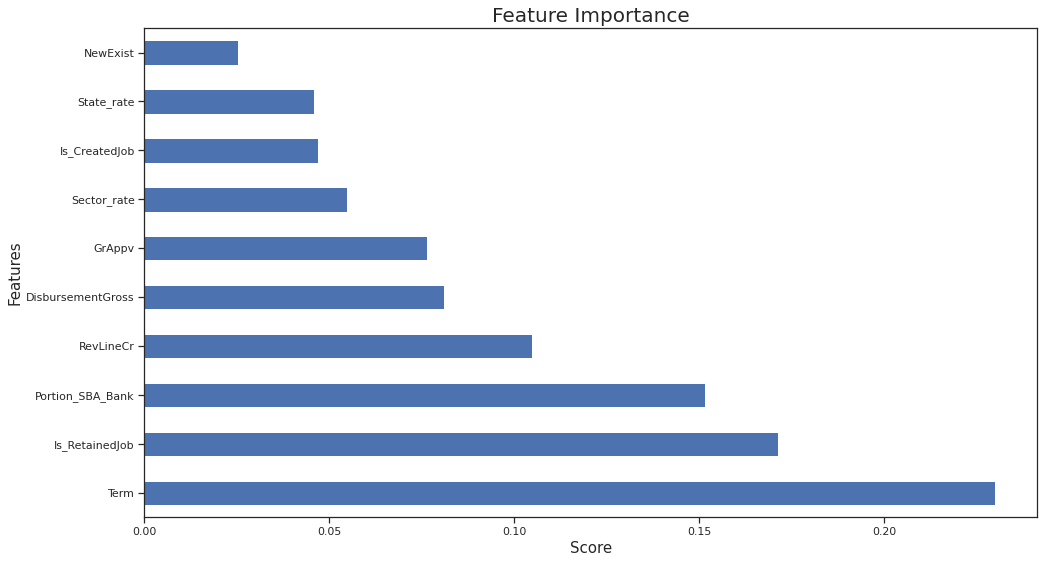

In [ ]:

model = XGBClassifier()
model.fit(X,y)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
f, ax = plt.subplots(figsize=(16,9))
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Features', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.show()

It can be seen that there are 10 variables that affect our target:

1. **Term (length of loan)** = 
  - it makes perfect sense, this is the highest because if a company borrows for a long period of time, the possibility to re-shoot it will be greater because the interest given will be smaller, making it easier for the company to pay and economic stability economically national and international which has little impact, which ultimately makes the company reduce the possibility of default.
2. **RevLineCr = Revolving Line of credit** is when you borrow and continue to borrow again. It could be said that if he could do the revolving then the bank had judged that this company was able to pay the loan so that it was given another loan. So if this company revolving line of credit also makes the company reduce the possibility of default.
3. **Portion_SBA_Bank = This is how much the SBA has the courage to provide guarantees from loans provided by the Bank**. The greater the percentage, automatically the SBA is confident enough with the company not to default.
4. **Is_RetainedJob = Does the company have permanent employees?** Because if not, it is likely that the company is not yet stable because it is not able to have permanent employees. If it is not stable, then the possibility to be maximized in business is not yet, thus increasing the possibility of default.
5. **DisbursementGross** = Being an important factor also because the loan amount paid is whether there is a penalty or is in accordance with the loan at the beginning, if more then there is a possibility that he will have a penalty.
6. **State_rate** = Keep in mind that the policies for each region are different and also this is calculated by the average number of defaulting regions from all sectors, so the higher the policy, the more likely it is to default.
7. **GrAppv** = Is the loan amount provided by the bank. We cannot see this from one side only because the bank also has its own size.
Recssion = If he is active during difficult times such as a recession, then the chances of his business are stable, because at that time he is still active, so that the possibility of default is less.
8. **Sector_rate **= as well as **State rate**, each sector also has a default rate or percentage of the possibility of default of each. Because it is impossible to be equated in the oil & gas sector, mining is equated with Retail Trade because the risks and stability of the business are different.
9. **Is_CreatedJob = Opening employment** is also a calculation because by opening jobs, it can be seen that the company is developing operationally with an increase in recruited employees, so that if the company grows it will reduce the possibility of default.


It should be noted that all of these variables cannot be seen from one side alone, but there are relationships between variables. Because my background is not a banking, economist or financial person, I analyzed this based on the logic and guidelines provided by the SBA. There needs to be someone from the business domain who is better able to explain these variables to the probability of default.

Based on the feature selection above, we will select those features and discard them features that are not target relevant

In [ ]:

df = df[['RevLineCr', 'Term', 'Portion_SBA_Bank', 'GrAppv', 'State_rate', 'DisbursementGross',
            'Is_RetainedJob', 'Sector_rate', 'Recession', 'Is_CreatedJob', 'MIS_Status']]
df.shape

(378251, 11)

## Imbalance Dataset

# Shortlist Promising models

Because this is a classification problem and the target variable in the dataset we have is a very good comparison because the percentage of defaulters is definitely less than those that are successful, so we need to handle this so that when we enter the model **there is no bias because of differences ration on the target variable**.

We check the target variable ratio

In [ ]:

print(df.MIS_Status.value_counts())
print('-'*50)
print('MIS_Status (0): {} %'.format(df[(df['MIS_Status'] == 0)].shape[0]/df.shape[0]*100))
print('MIS_Status (1): {} %'.format(df[(df['MIS_Status'] == 1)].shape[0]/df.shape[0]*100))


0    356751
1     21500
Name: MIS_Status, dtype: int64
--------------------------------------------------
MIS_Status (0): 94.31594364588594 %
MIS_Status (1): 5.684056354114067 %


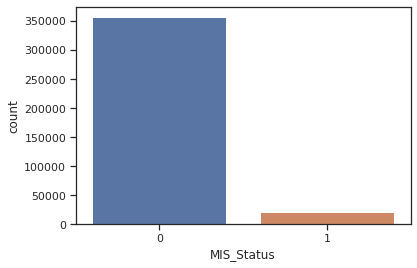

In [ ]:
sns.countplot("MIS_Status",data=df)

it can be seen that our target variable is imbalance or imbalance, 0 (Not Default): 94.3% and 1 (Default): 5.7% so we will deal with this problem, because otherwise the model will be more likely to predict 0 because there are more in number

first we will divide the data into train and test, but keep in mind, if our target data is imbalance so that we divide the data in the train and the test must match, so there should not be any data sharing only contains 0 or the majority, that's why we use stratify = y

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

y = df['MIS_Status']
X = df.drop(columns=['MIS_Status'], axis=1)
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=27, stratify=y) #Don't forget to stratify

Here I used SMOTE and then undersampled it again

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [ ]:
#Imbalance Dataset
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

over = SMOTE(sampling_strategy='minority')
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)


X_train, y_train = pipeline.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Modelling


After all the data is clean and ready to be entered into the model, it is time for us to create a model and look for the most fixed model. Here I immediately evaluate it after making a model, trained and tested in order to make it easier to see which model is the most optimal.

In [ ]:
#Create a function that can later be trained and tested and then evaluated
def model_eval(algo,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_train_ypred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,-1]

    #TEST

    y_test_ypred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,-1]
    y_probas = algo.predict_proba(X_test)
    
    #Confussion Matrix
    plot_confusion_matrix(algo, X_test, y_test)
    plt.show() 
    print('='*100)
    print('Classification Report: \n', classification_report(y_test, y_test_ypred, digits=3))
    print('='*100)
    
    #ROC Curve
    fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)
    skplt.metrics.plot_roc(y_test, y_probas,figsize=(16,9) )
    
    #PR Curve
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(16,9))
    plt.show()

## Logistic Regression

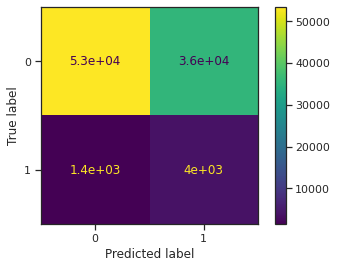

Classification Report: 
               precision    recall  f1-score   support

           0      0.974     0.599     0.742     89188
           1      0.100     0.735     0.175      5375

    accuracy                          0.607     94563
   macro avg      0.537     0.667     0.459     94563
weighted avg      0.924     0.607     0.710     94563



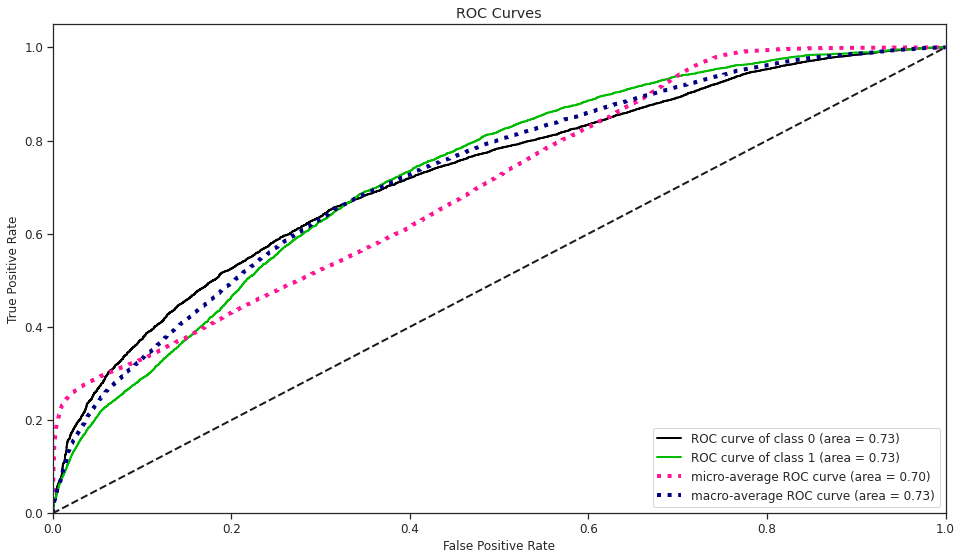

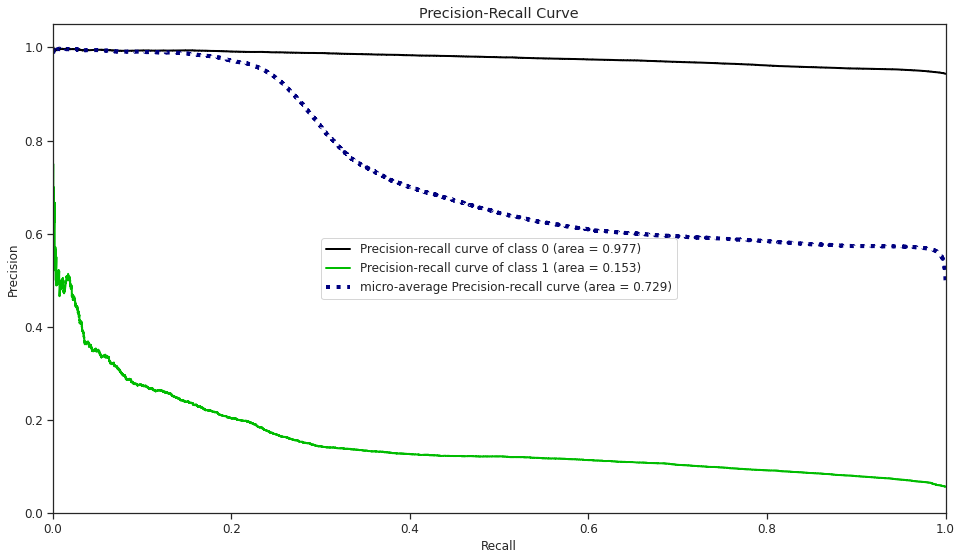

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, f1_score,auc,roc_curve,roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
#import scikitplot as skplt
#Using Logistic Regression
lr = LogisticRegression()
model_eval(lr,X_train,y_train,X_test,y_test)

## Gaussian NB

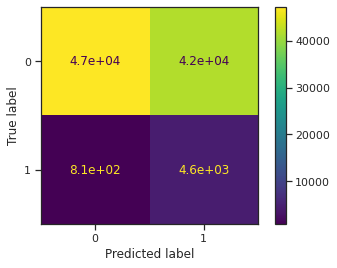

Classification Report: 
               precision    recall  f1-score   support

           0      0.983     0.530     0.689     89188
           1      0.098     0.849     0.176      5375

    accuracy                          0.548     94563
   macro avg      0.541     0.689     0.432     94563
weighted avg      0.933     0.548     0.659     94563



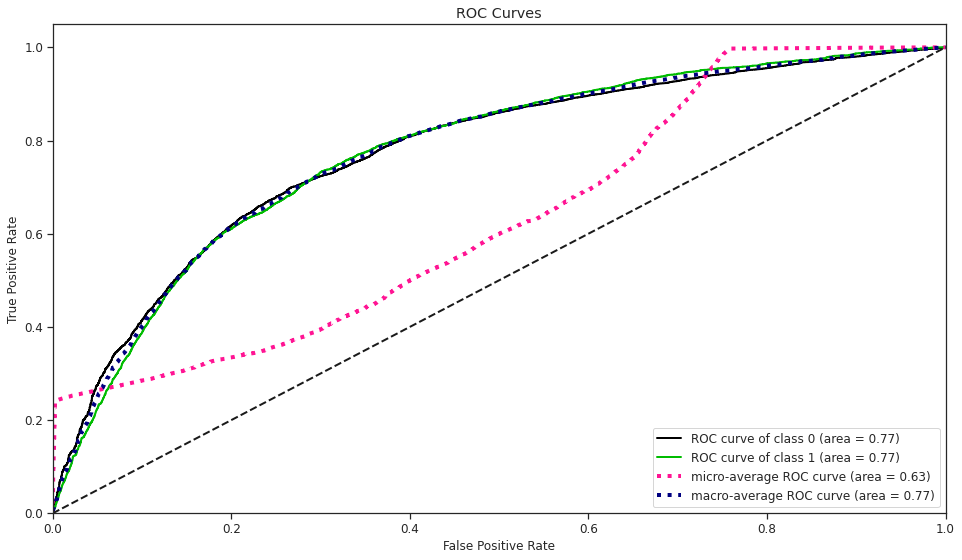

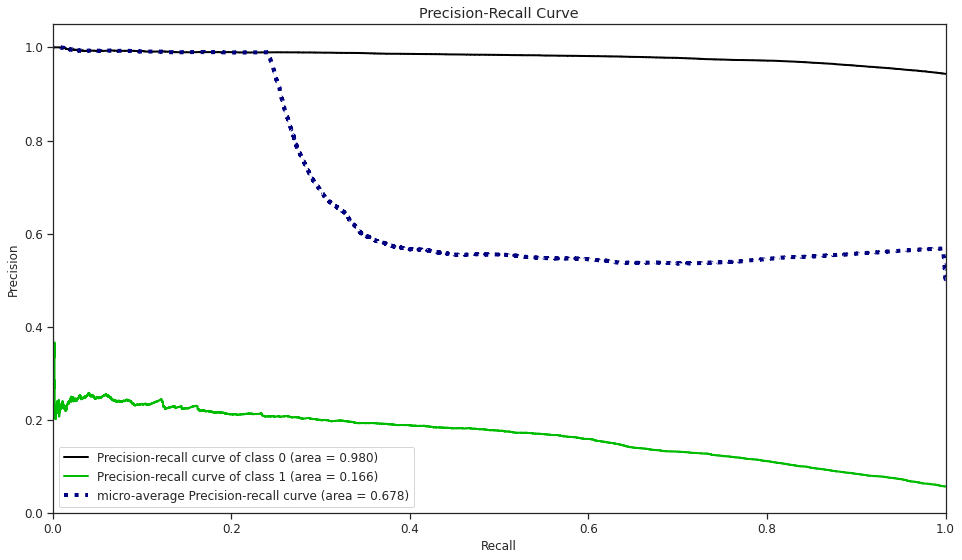

In [ ]:
nb = GaussianNB()
model_eval(nb,X_train,y_train,X_test,y_test)

## KNeighborsClassifier

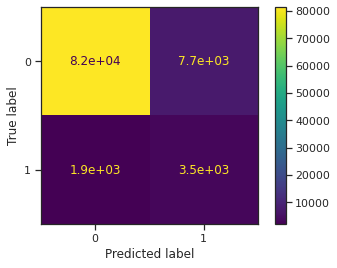

Classification Report: 
               precision    recall  f1-score   support

           0      0.977     0.914     0.945     89188
           1      0.311     0.642     0.419      5375

    accuracy                          0.899     94563
   macro avg      0.644     0.778     0.682     94563
weighted avg      0.939     0.899     0.915     94563



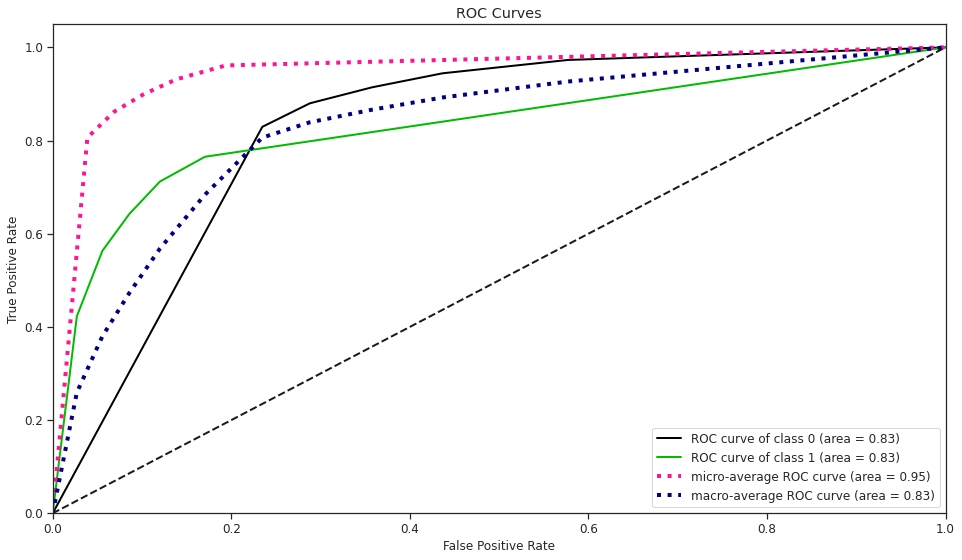

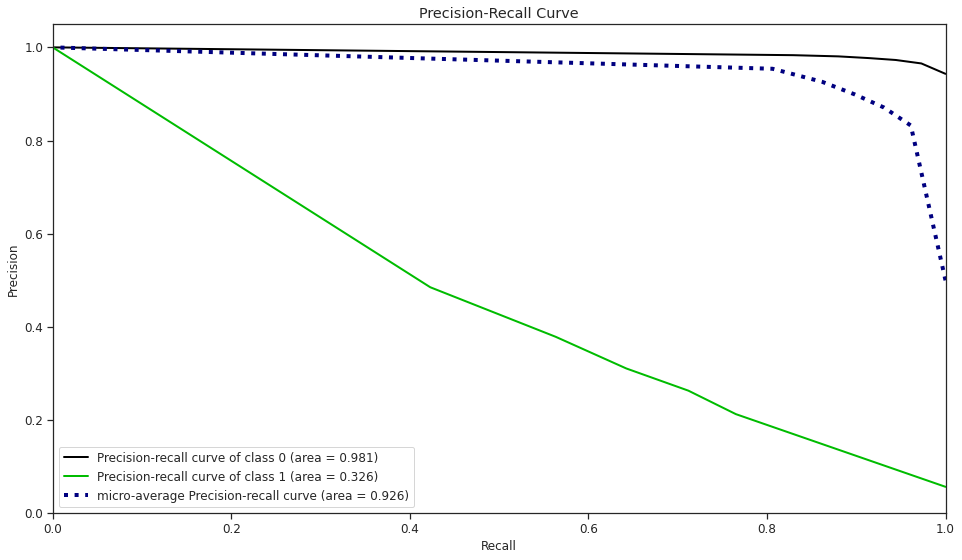

In [ ]:
knn = KNeighborsClassifier()
model_eval(knn,X_train,y_train,X_test,y_test)

## Random Forest Classifier

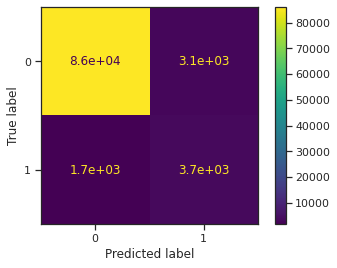

Classification Report: 
               precision    recall  f1-score   support

           0      0.981     0.966     0.973     89188
           1      0.549     0.692     0.612      5375

    accuracy                          0.950     94563
   macro avg      0.765     0.829     0.793     94563
weighted avg      0.957     0.950     0.953     94563



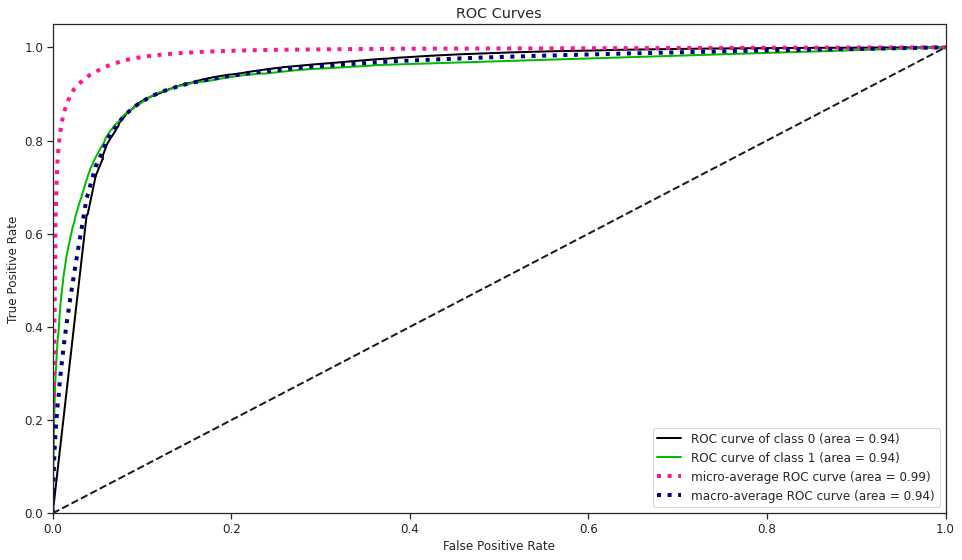

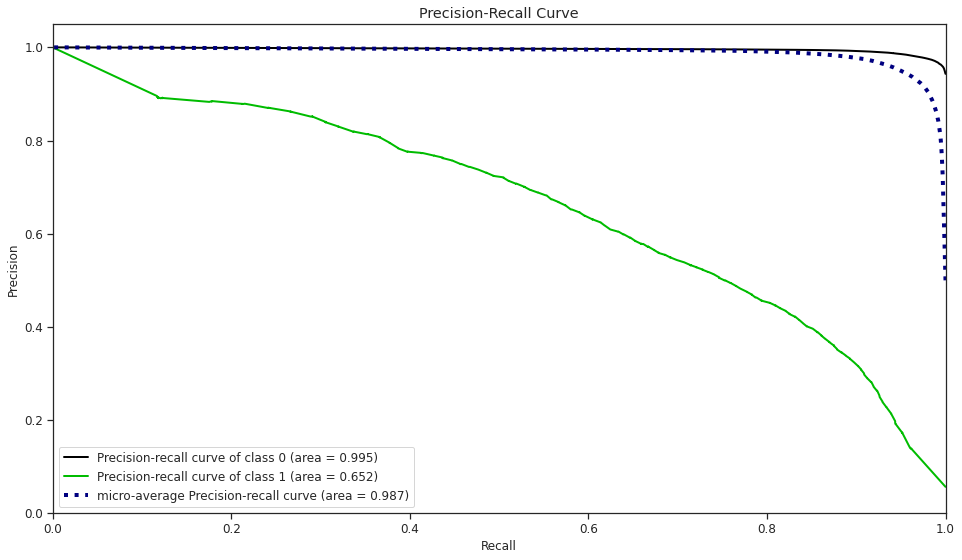

In [ ]:
rf = RandomForestClassifier()
model_eval(rf,X_train,y_train,X_test,y_test)

## XGB Classifier

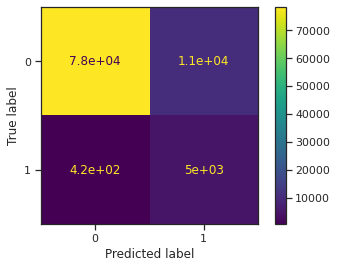

Classification Report: 
               precision    recall  f1-score   support

           0      0.995     0.879     0.933     89188
           1      0.315     0.922     0.470      5375

    accuracy                          0.882     94563
   macro avg      0.655     0.901     0.702     94563
weighted avg      0.956     0.882     0.907     94563



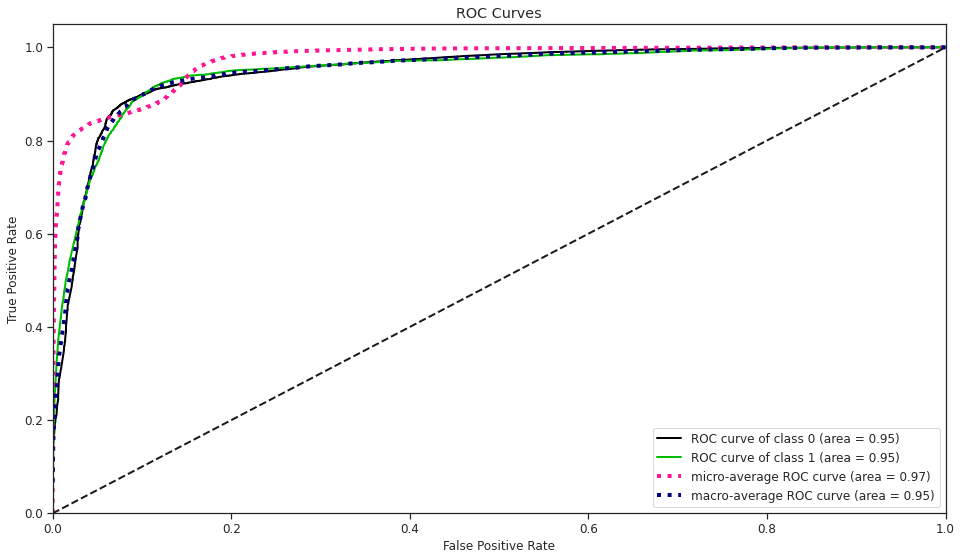

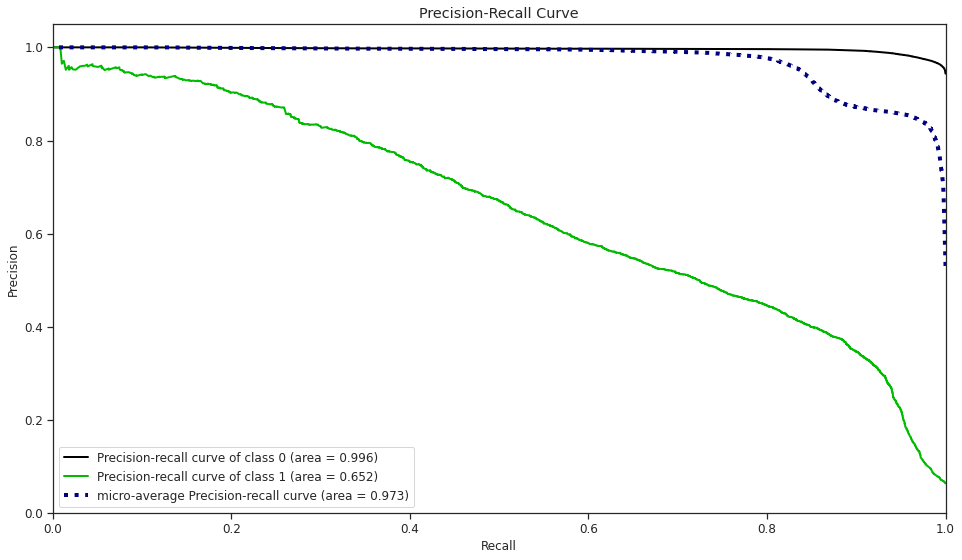

In [ ]:
xgb = XGBClassifier()
model_eval(xgb,X_train,y_train,X_test,y_test)

## Decision Tree Classifier

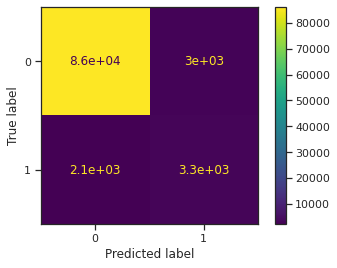

Classification Report: 
               precision    recall  f1-score   support

           0      0.976     0.967     0.971     89188
           1      0.523     0.609     0.563      5375

    accuracy                          0.946     94563
   macro avg      0.750     0.788     0.767     94563
weighted avg      0.950     0.946     0.948     94563



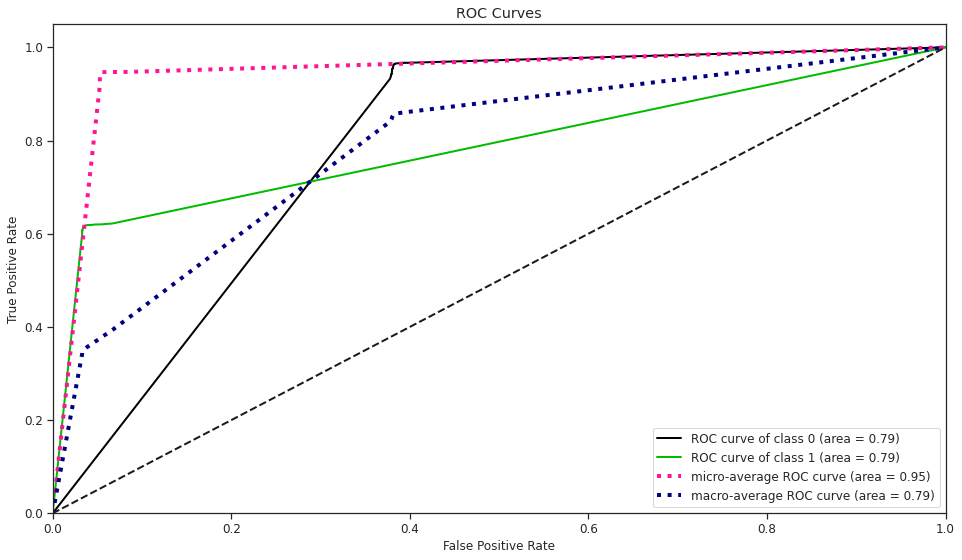

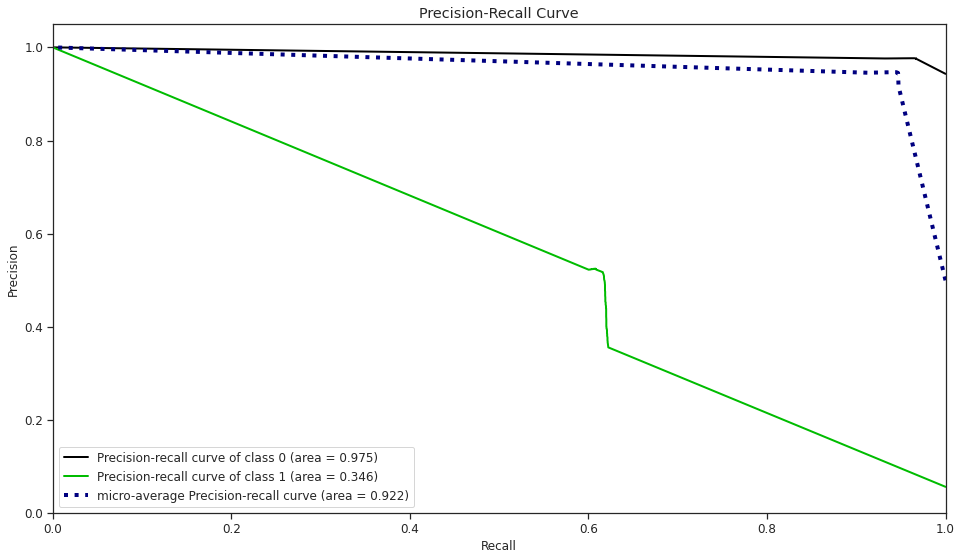

In [ ]:
dt = DecisionTreeClassifier()
model_eval(dt,X_train,y_train,X_test,y_test)

## Random Forest Classifier

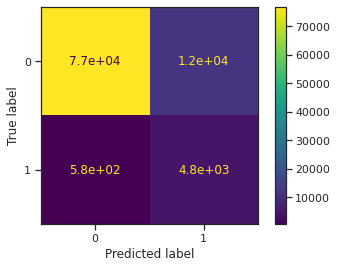

Classification Report: 
               precision    recall  f1-score   support

           0      0.993     0.861     0.922     89188
           1      0.280     0.893     0.426      5375

    accuracy                          0.863     94563
   macro avg      0.636     0.877     0.674     94563
weighted avg      0.952     0.863     0.894     94563



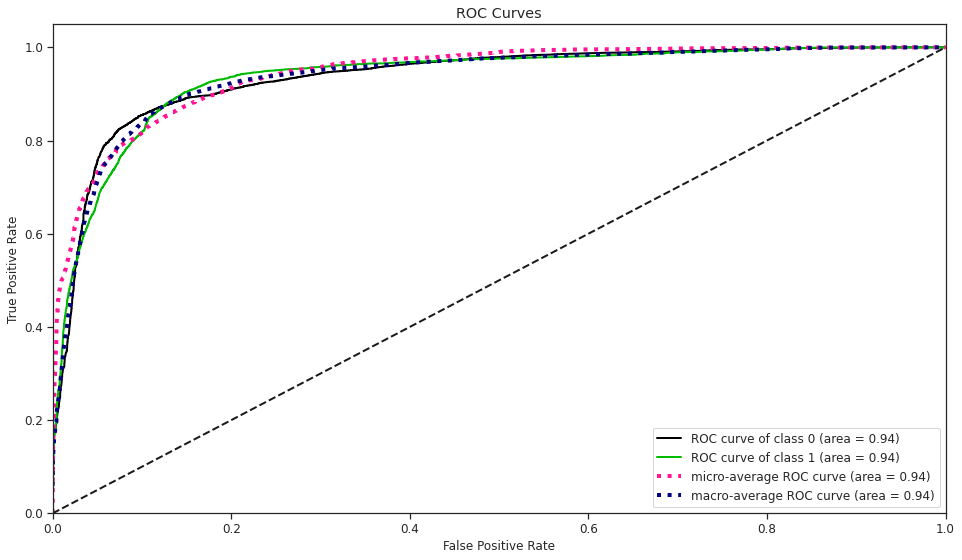

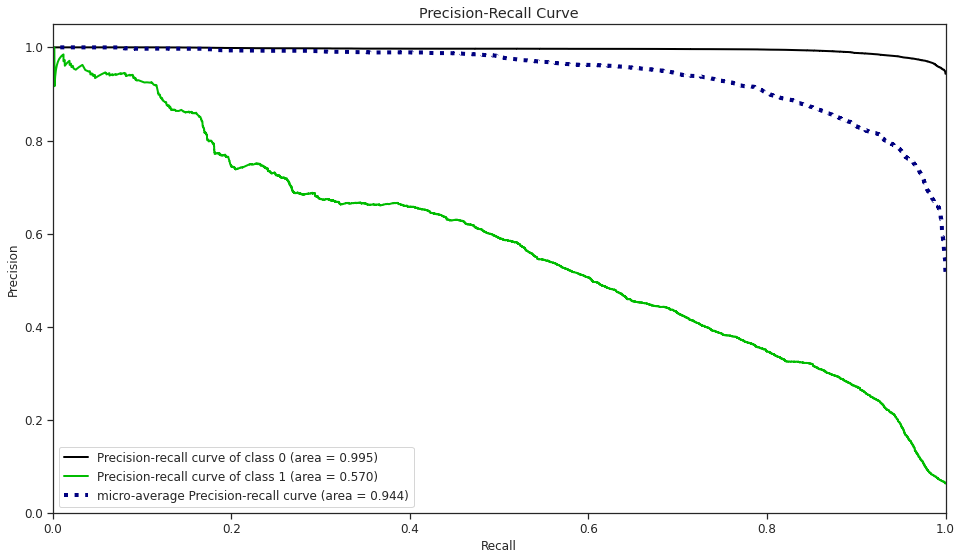

In [ ]:
rf2 = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1, random_state =50, max_features = "auto",max_leaf_nodes = 30)
model_eval(rf2,X_train,y_train,X_test,y_test)

## MLPClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


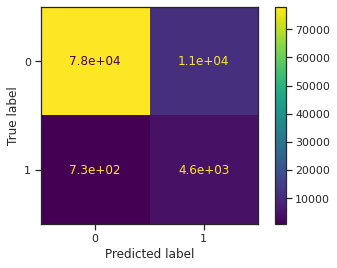

Classification Report: 
               precision    recall  f1-score   support

           0      0.991     0.874     0.929     89188
           1      0.292     0.864     0.437      5375

    accuracy                          0.873     94563
   macro avg      0.641     0.869     0.683     94563
weighted avg      0.951     0.873     0.901     94563



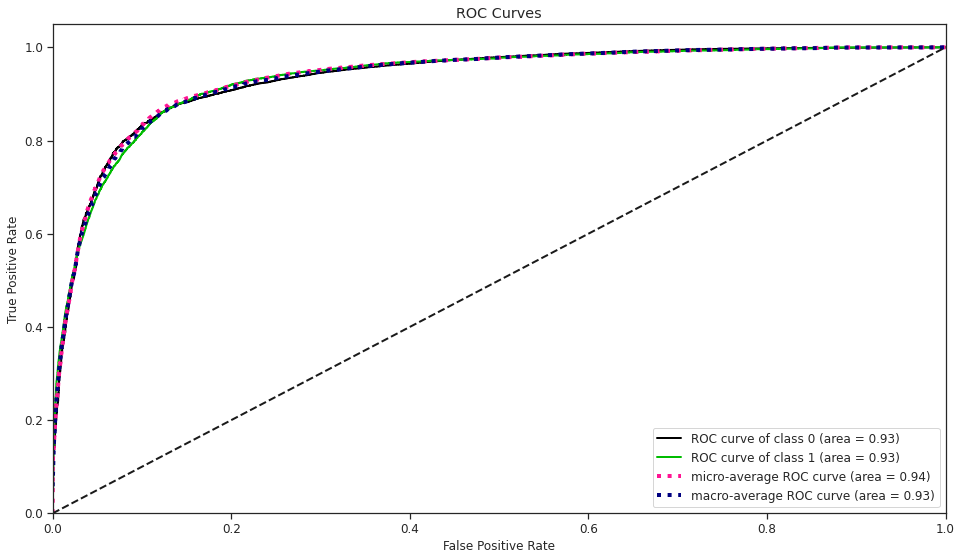

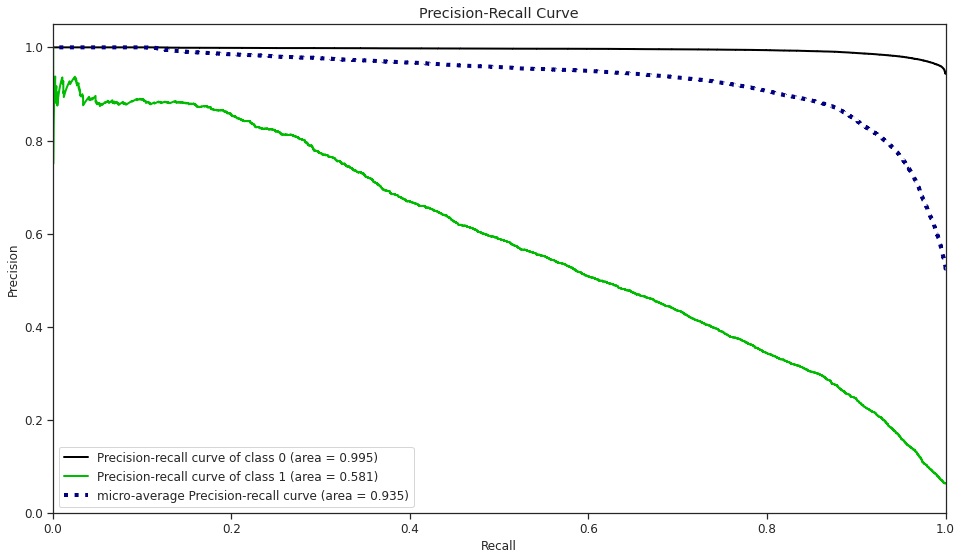

In [ ]:
mlpc = MLPClassifier()
model_eval(mlpc,X_train,y_train,X_test,y_test)

## SGD

In [ ]:
#sgd = SGDClassifier(max_iter=1000, tol=1e-3)
#model_eval(sgd,X_train,y_train,X_test,y_test)

## CatBoost

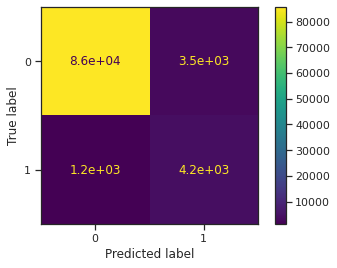

Classification Report: 
               precision    recall  f1-score   support

           0      0.986     0.961     0.973     89188
           1      0.545     0.780     0.642      5375

    accuracy                          0.951     94563
   macro avg      0.766     0.870     0.808     94563
weighted avg      0.961     0.951     0.955     94563



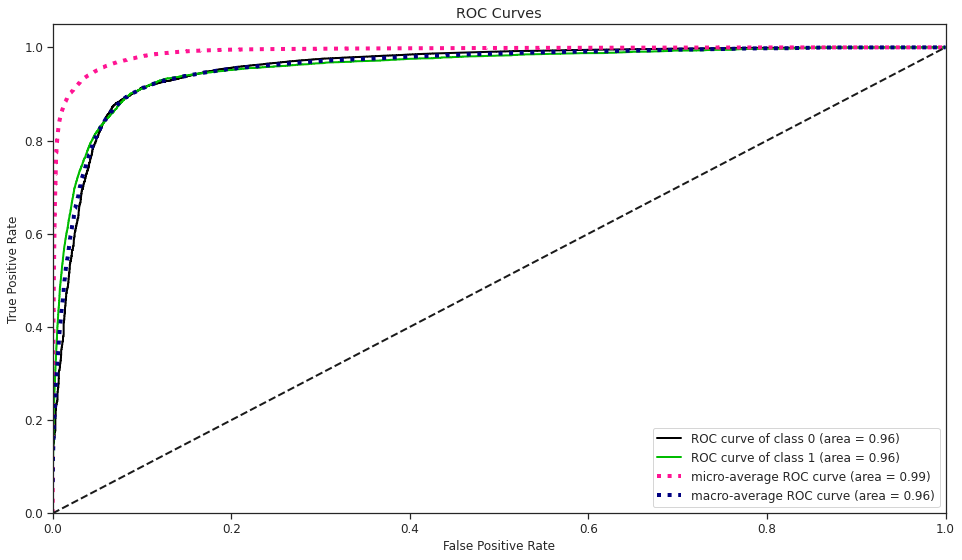

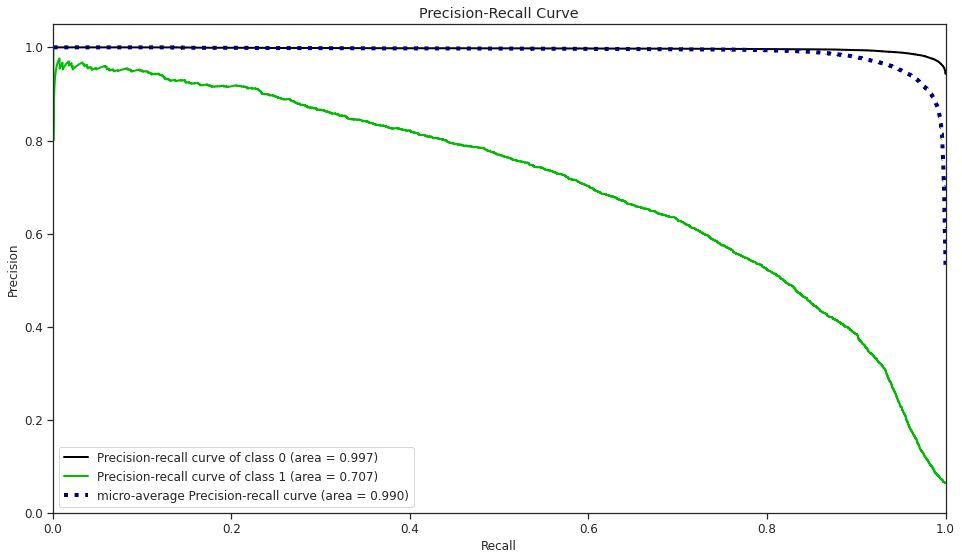

In [ ]:
cat = CatBoostClassifier(logging_level='Silent')
model_eval(cat,X_train,y_train,X_test,y_test)

## Gradient Boosting

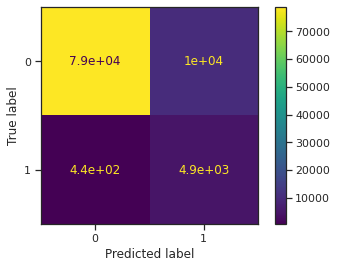

Classification Report: 
               precision    recall  f1-score   support

           0      0.994     0.884     0.936     89188
           1      0.322     0.919     0.477      5375

    accuracy                          0.886     94563
   macro avg      0.658     0.901     0.706     94563
weighted avg      0.956     0.886     0.910     94563



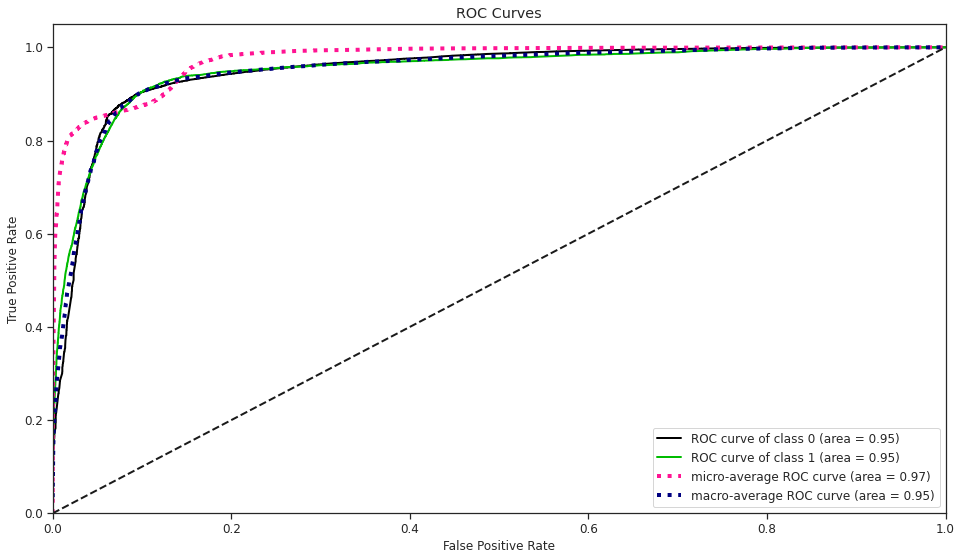

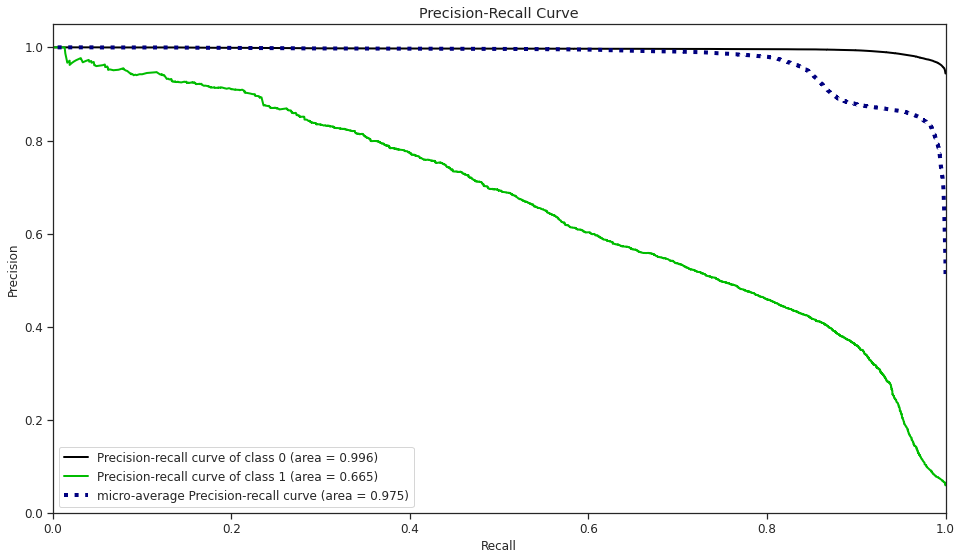

In [ ]:
GradBo = GradientBoostingClassifier()
model_eval(GradBo,X_train,y_train,X_test,y_test)

## Ada

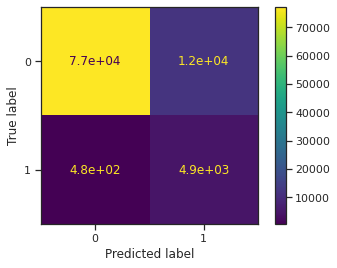

Classification Report: 
               precision    recall  f1-score   support

           0      0.994     0.865     0.925     89188
           1      0.289     0.910     0.439      5375

    accuracy                          0.868     94563
   macro avg      0.641     0.887     0.682     94563
weighted avg      0.954     0.868     0.897     94563



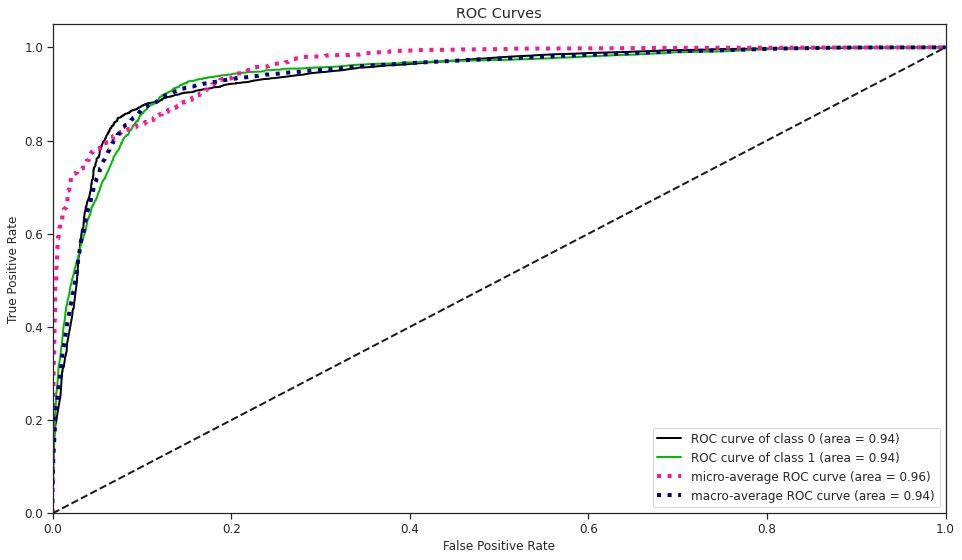

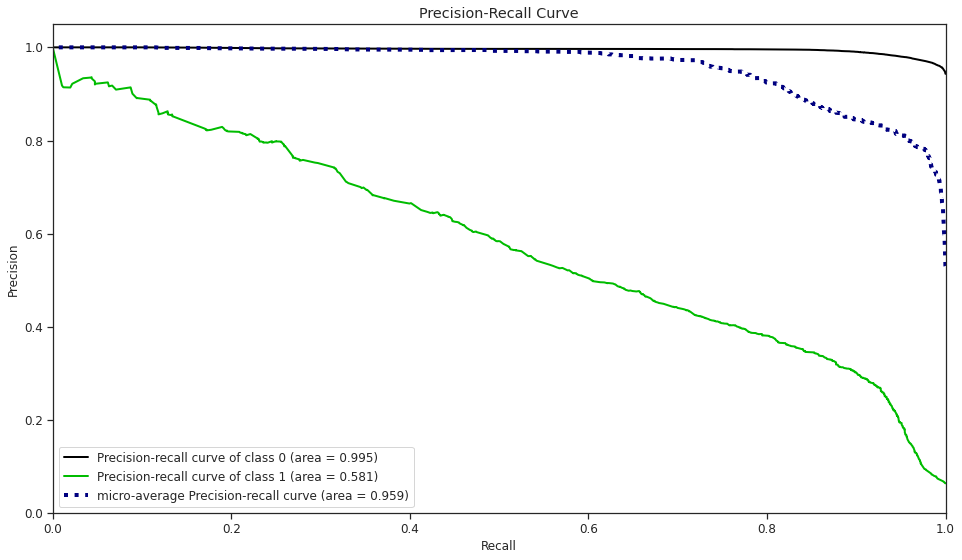

In [ ]:
Ada = AdaBoostClassifier()
model_eval(Ada,X_train,y_train,X_test,y_test)

## Extra Trees

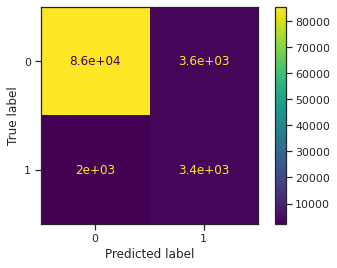

Classification Report: 
               precision    recall  f1-score   support

           0      0.977     0.959     0.968     89188
           1      0.481     0.625     0.544      5375

    accuracy                          0.940     94563
   macro avg      0.729     0.792     0.756     94563
weighted avg      0.949     0.940     0.944     94563



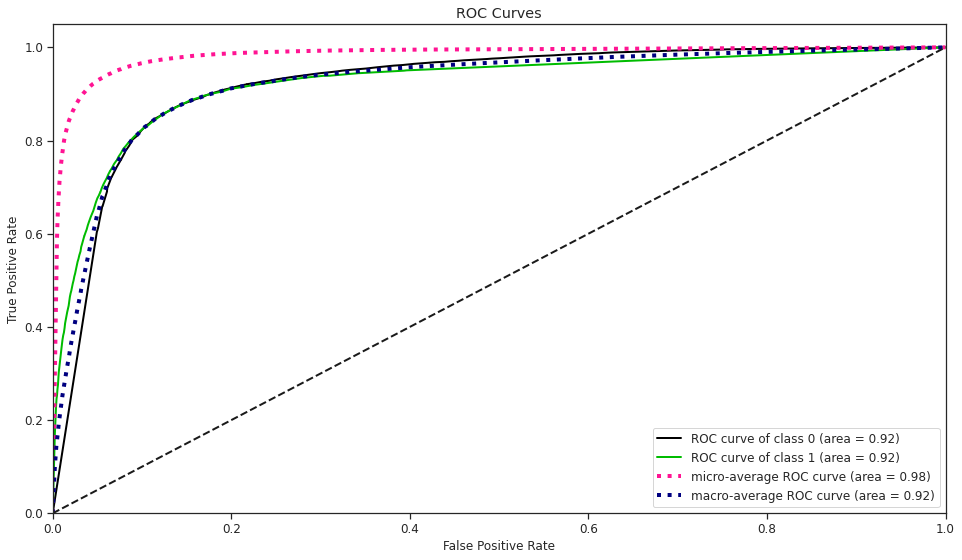

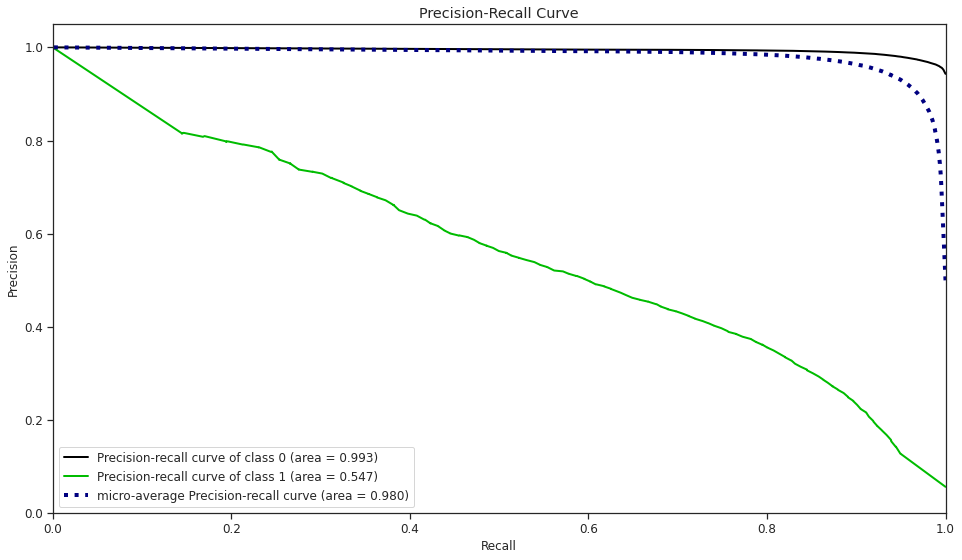

In [ ]:
ExtTree = ExtraTreesClassifier()
model_eval(ExtTree,X_train,y_train,X_test,y_test)

## SGD

In [ ]:
#SGD= SGDClassifier(max_iter=1000, tol=1e-3)
#model_eval(SGD,X_train,y_train,X_test,y_test)

In [ ]:
SVC = SVC(probability=True, C=1/0.3, gamma=0.1)
model_eval(SVC,X_train,y_train,X_test,y_test)